GDrive connect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-probability

In [ ]:
import keras
import tensorflow as tf


print(keras.__version__)
print(tf.__version__)

3.5.0
2.17.1


#1

In [ ]:
!pip install --upgrade mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 50.3 MB/s eta 0:00:00


In [ ]:
from datetime import datetime
start_time = datetime.now()

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from mne.io import read_raw_bdf
import pandas as pd
import mne
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
from matplotlib import ticker
# import plotly.plotly as py
import numpy as np
import os
from scipy.io import loadmat
import scipy.io
import math as m
from scipy.interpolate import griddata
import random
import math

In [ ]:
'''
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc10/ses-hc/eeg/sub-hc10_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc18/ses-hc/eeg/sub-hc18_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc20/ses-hc/eeg/sub-hc20_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc21/ses-hc/eeg/sub-hc21_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc31/ses-hc/eeg/sub-hc31_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc32/ses-hc/eeg/sub-hc32_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc33/ses-hc/eeg/sub-hc33_ses-hc_task-rest_eeg.bdf

/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf
/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf


'''

'\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc10/ses-hc/eeg/sub-hc10_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc18/ses-hc/eeg/sub-hc18_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc20/ses-hc/eeg/sub-hc20_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc21/ses-hc/eeg/sub-hc21_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf\n\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf\n/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc31/ses-hc/eeg/su

#2

In [ ]:
person=2
def readDataset(verbose=False):
  raw = mne.io.read_raw_bdf('/content/drive/MyDrive/Masters Dataset/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf', preload=True)
  #print(raw)
  #print(raw.info)
  print(raw._data.shape)
  rawDataset = raw.copy()
  ch_names= ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8','Status']
  rawDataset=rawDataset.drop_channels(ch_names, on_missing='raise')
  #rawDatasetForMontageLocation=rawDataset.copy()

  channelNames = ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7',
          'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2',
          'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']

  montage = mne.channels.make_standard_montage('biosemi32')


  info = mne.create_info(ch_names=channelNames, sfreq=128, ch_types='eeg')
  info.set_montage(montage)


  #A bandpass frequency filter from 4.0-45.0Hz was applied.
  rawDataset.filter(0.1, 50., fir_design='firwin')


  #pre-process data
  #downsampling to 128
  rawDataset = rawDataset.resample(sfreq=128)

  # use the average of all channels as reference
  rawDatasetReReferenced = rawDataset.copy().set_eeg_reference(ref_channels='average')
  rawDatasetForMontageLocation=rawDatasetReReferenced.copy()



  transposedDataset = np.transpose(rawDatasetReReferenced._data)
  print ("Length of data: {}".format(len(transposedDataset)))


  if (verbose):
    rawDataset.plot()
    rawDatasetReReferenced.plot()

  if (verbose):
    for i in range(10):
      randomIndex = random.randint(0,len(transposedDataset))
      print ("Random index: {}".format(randomIndex))
      fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3), gridspec_kw = {'wspace':0, 'hspace':0.2})
      sampleUnderAnalysis = transposedDataset[randomIndex,:]
      #print (sampleUnderAnalysis)

      ax = axes
      ax.title.set_text('raw dataset')
      im,_ = mne.viz.topomap.plot_topomap(sampleUnderAnalysis,info,names=channelNames,axes=ax,cmap='Spectral_r',show=False)
      #ax.axis('off')

      plt.show()

  return transposedDataset,rawDatasetForMontageLocation

# All functions for converting 3D coordinates to 2D and reading the channel location
rawDataset,rawDatasetForMontageLocation= readDataset(verbose=False)
rawDatasetForMontageLocation.set_montage('biosemi32')
MontageChannelLocation=rawDatasetForMontageLocation.info['dig']

#initialisation for all required variables.
rawDatasetForMontageLocation.set_montage('biosemi32')
MontageChannelLocation=rawDatasetForMontageLocation.info['dig']
sfreq=128
NumberOfEEGChannel=32
lengthOfTopographicMap=40
StartingSamplePoint= 0
EndSamplePoint= rawDataset.shape[0]-1
EndSamplePoint= 24448
NumberOfTopomapsGenerating=EndSamplePoint-StartingSamplePoint

def getChannelNames():
  channelNames = ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7',
        'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2',
        'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']
  return channelNames

def getChannellInfoForSample (channelNames, channelValues, onlyValues=False):
  i = 0
  channelValuesforCurrentSample = []
  for ch in channelNames:
    chValue = channelValues[i]
    if (onlyValues):
      channelValuesforCurrentSample.append(chValue)
    else:
      channelValuesforCurrentSample.append((ch, chValue))
    i+=1

  return channelValuesforCurrentSample


def azim_proj(pos):
    """
    Computes the Azimuthal Equidistant Projection of input point in 3D Cartesian Coordinates.
    Imagine a plane being placed against (tangent to) a globe. If
    a light source inside the globe projects the graticule onto
    the plane the result would be a planar, or azimuthal, map
    projection.

    :param pos: position in 3D Cartesian coordinates    [x, y, z]
    :return: projected coordinates using Azimuthal Equidistant Projection
    """
    [r, elev, az] = cart2sph(pos[0], pos[1], pos[2])
    return pol2cart(az, m.pi / 2 - elev)


def cart2sph(x, y, z):
    """
    Transform Cartesian coordinates to spherical
    :param x: X coordinate
    :param y: Y coordinate
    :param z: Z coordinate
    :return: radius, elevation, azimuth
    """
    x2_y2 = x**2 + y**2
    r = m.sqrt(x2_y2 + z**2)                    # r     tant^(-1)(y/x)
    elev = m.atan2(z, m.sqrt(x2_y2))            # Elevation
    az = m.atan2(y, x)                          # Azimuth
    return r, elev, az


def pol2cart(theta, rho):
    """
    Transform polar coordinates to Cartesian
    :param theta: angle value
    :param rho: radius value
    :return: X, Y
    """
    #print ('----------')
    #print (rho * m.cos(theta))
    #print (rho * m.sin(theta))
    return rho * m.cos(theta), rho * m.sin(theta)
"""
def get3DCoordinates(rawDatasetForMontageLocation):
    rawDatasetForMontageLocation.set_montage('biosemi32')
    result=rawDatasetForMontageLocation.info['dig']
    result=result[3:]
    location=[]
    for i in range(0,32):

      v=result[i].values()
      values = list(v)
      a=(values[1])*1000
      location.append(a)
    MontageLocation=np.array(location)
    #MontageLocation=trunc(MontageLocation,decs=3)
    MontageLocation= np.round(MontageLocation,1)
    MontageLocation=MontageLocation.tolist()
    return MontageLocation
"""

def getBrainRateForTimeSlice(brainRatesForChannels):
    #return (np.mean(brainRatesForChannels))
    return (np.sum(brainRatesForChannels))

def get3DCoordinates(MontageChannelLocation,EEGChannels):
    MontageChannelLocation=MontageChannelLocation[-EEGChannels:]
    location=[]
    for i in range(0,32):

      v=MontageChannelLocation[i].values()
      values = list(v)
      a=(values[1])*1000
      location.append(a)
    MontageLocation=np.array(location)
    #MontageLocation=trunc(MontageLocation,decs=3)
    MontageLocation= np.round(MontageLocation,1)
    MontageLocation=MontageLocation.tolist()
    return MontageLocation


pos_3d = get3DCoordinates(MontageChannelLocation,NumberOfEEGChannel)
def convert3DTo2D(pos_3d):
  pos_2d = []
  for e in pos_3d:
    pos_2d.append(azim_proj(e))
  return (pos_2d)


Extracting EDF parameters from /content/drive/MyDrive/Masters Dataset/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
(41, 97792)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16897 samples (33.002 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Length of data: 24448


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


#3

In [ ]:
# Create topographic map for a specific sample (of 32 channels) #nearest
def createTopographicMapFromChannelValues(channelValues, interpolationMethod = "cubic", verbose=False):
  #retrieve the names of channels
  channelNames = getChannelNames()
  #channelValues=channelValues.transpose(1,0)
  listOfChannelValues = getChannellInfoForSample(channelNames, channelValues, onlyValues=True)
  #print(listOfChannelValues)
  #create an empty (with zeros) topographic map of lengthOfTopographicMap x lengthOfTopographicMap pixels
  emptyTopographicMap = np.array(np.zeros([lengthOfTopographicMap, lengthOfTopographicMap]))
  if (verbose):
    #print the empty topographic map
    plt.imshow(emptyTopographicMap)
    plt.show()

  pos2D=np.array(convert3DTo2D(get3DCoordinates(MontageChannelLocation,NumberOfEEGChannel)))
  #print(pos2D)
  #input()
  grid_x, grid_y = np.mgrid[
                     min(pos2D[:, 0]):max( pos2D[:, 0]):lengthOfTopographicMap*1j,
                     min( pos2D[:, 1]):max( pos2D[:, 1]):lengthOfTopographicMap*1j
                     ]
  #print(grid_x)
  #print(grid_y)
  #Generate edgeless images
  min_x, min_y = np.min(pos2D, axis=0)
  max_x, max_y = np.max(pos2D, axis=0)
  locations = np.append(pos2D, np.array([[min_x, min_y], [min_x, max_y],[max_x, min_y],[max_x, max_y]]),axis=0)
  #channelValuesForSample =channelValues
  #print(locations)
  #input()
  # interpolate edgeless topographic map and show it
  interpolatedTopographicMap = griddata(pos2D, channelValues, (grid_x, grid_y), method=interpolationMethod, fill_value=0)


  #coordinates where the pixel values are zero
  CordinateYellowRegion=np.argwhere(interpolatedTopographicMap == 0.)

  if (verbose):
    i=0
    for chVal in channelValues:
      for x in range (32):
        for y in range (32):
          print ("Trying to find value {} in pixel ({},{}-{})".format(chVal, x, y, interpolatedTopographicMap[x][y] ))
          if (chVal == interpolatedTopographicMap[x][y]):
            print ("Value found at pixel ({}{}) for channel: {}".format(x, y,channelNames[i] ))
      i=i+1

  if (verbose):
    plt.imshow(interpolatedTopographicMap)
    plt.show()

  return interpolatedTopographicMap,CordinateYellowRegion


In [ ]:

def retrieveChannelInfoFromInterpolatedMap(interpolatedMap, CordinateYellowRegion,onlyValues=False):

  pixelCoordinates = get2DTopographicMapChannelIndexes(lengthOfTopographicMap,CordinateYellowRegion)
  channelInfoFromInterpolatedMap = []
  i = 0
  for c in pixelCoordinates:
    x = c[0]
    y = c[1]
    channelValue = interpolatedMap[x][y]
    if (onlyValues):
      channelInfoFromInterpolatedMap.append(channelValue)
    else:
      channelInfoFromInterpolatedMap.append((channelNames[i], channelValue))
    i+=1

  return channelInfoFromInterpolatedMap


# Compute 2D coordinates of pixels in the topographic map, as (x,y coordinates)
def getMatrixIndexesFrom2DPositions(xPos, yPos, minX, minY, maxX, maxY, numChannels, CordinateYellowRegion,verbose=False):

  #rescaling inputs coordinates into specific indexes of a numChannels X numChannels matrix, with min-max normalisation algorithm
  #remove -1 from numChannels because the indexes start with 0
  x = ((xPos - minX) * (numChannels-1 -0) ) / (maxX-minX)
  y = ((yPos - minY) * (numChannels-1 -0) ) / (maxY-minY)

  #round integer to the nearest integer
  indexX = round(x)
  indexY = round(y)


  if [indexX, indexY] not in CordinateYellowRegion.tolist() :
    indexX1, indexY1 = indexX, indexY

  elif (([indexX, indexY+1] not in CordinateYellowRegion.tolist()) and ([indexX, indexY+1] != [indexX,lengthOfTopographicMap])) :
    indexX1, indexY1 = indexX, indexY+1

  elif [indexX, indexY-1] not in CordinateYellowRegion.tolist() :
    indexX1, indexY1 = indexX, indexY-1

  elif (([indexX-1, indexY] not in CordinateYellowRegion.tolist()) and ([indexX-1, indexY] != [-1,indexY])) :
    indexX1, indexY1 = indexX-1, indexY

  else:

    indexX1, indexY1 = indexX+1, indexY

  indexX1, indexY1

  return indexX1, indexY1
  if (verbose):
    print("Tranformed positions: {},  {} - Generated matrix indeces: {}, {}".format(x, y, indexX, indexY))




def get2DTopographicMapChannelIndexes(lengthOfTopographicMap,CordinateYellowRegion):
  pos3D = get3DCoordinates(MontageChannelLocation,NumberOfEEGChannel)
  pos2D = []

  minX, maxX, minY, maxY =0,0,0,0
  for e in pos3D:
    newPos = (azim_proj(e))
    pos2D.append(newPos)

    if (newPos[0]<minX):
      minX = newPos[0]
    if (newPos[1]<minY):
      minY = newPos[1]
    if (newPos[0]>maxX):
      maxX = newPos[0]
    if (newPos[1]>maxY):
      maxY = newPos[1]

  channelLocs = np.array(pos2D)
  xMatrixIndices = []
  yMatrixIndices = []
  coordinates2dWithoutScale = []
  for ch in channelLocs:
    x,y = getMatrixIndexesFrom2DPositions(ch[0], ch[1], minX, minY, maxX, maxY, lengthOfTopographicMap, CordinateYellowRegion,verbose=False)
    xMatrixIndices.append(x)
    yMatrixIndices.append(y)
    coordinates2dWithoutScale.append((x,y))

  return coordinates2dWithoutScale



In [ ]:
#read dataset and generate Topographic Maps to train the autoencoder with listOfTopographicMapsForAE
rawDataset,rawDatasetForMontageLocation = readDataset(verbose=False)

#extract the values of those pixels at the 32 coordinates from an interpolated topographic map
#coordinates2D = get2DTopographicMapChannelIndexes(lengthOfTopographicMap,CordinateYellowRegion)
channelNames = getChannelNames()

listOfTopographicMapsForAE = []
for i in range(StartingSamplePoint,EndSamplePoint):
  #get a random sample and load its 32 values
  channelValuesForCurrentSample = list(rawDataset[i,:])

  #create topographic map
  interpolatedTopographicMap,CordinateYellowRegion = createTopographicMapFromChannelValues(channelValuesForCurrentSample, interpolationMethod="cubic",verbose=False)
  #plt.imshow(interpolatedTopographicMap)
  #plt.show()
  listOfTopographicMapsForAE.append(interpolatedTopographicMap)

#train the autoencoder with listOfTopographicMapsForAE
listOfTopographicMapsForAE=np.array(listOfTopographicMapsForAE)
#np.save('/content/drive/MyDrive/Masters Dataset/Maps/Standard'+str(person),listOfTopographicMapsForAE)


Extracting EDF parameters from /content/drive/MyDrive/Masters Dataset/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
(41, 97792)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16897 samples (33.002 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Length of data: 24448


In [ ]:
# Extract the global min and max values across all maps
global_min = np.min(listOfTopographicMapsForAE)
global_max = np.max(listOfTopographicMapsForAE)

print(f"Global Min Value: {global_min}")
print(f"Global Max Value: {global_max}")

Global Min Value: -0.0002294054591982448
Global Max Value: 0.0002721753595462571


#3.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Read dataset and generate Topographic Maps to train the autoencoder with listOfTopographicMapsForAE
rawDataset, rawDatasetForMontageLocation = readDataset(verbose=False)

# Extract the values of those pixels at the 32 coordinates from an interpolated topographic map
channelNames = getChannelNames()

listOfTopographicMapsForAE = []
for i in range(StartingSamplePoint, EndSamplePoint):
    # Get a random sample and load its 32 values
    channelValuesForCurrentSample = list(rawDataset[i, :])

    # Create topographic map
    interpolatedTopographicMap, CordinateYellowRegion = createTopographicMapFromChannelValues(channelValuesForCurrentSample, interpolationMethod="cubic", verbose=False)

    # Set up MNE info object for 32 channels
    n_channels = 32
    sfreq = 1000  # Sampling frequency (arbitrary for topographic visualization)
    ch_names = channelNames[:n_channels]
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

    # Create an EvokedArray object for plotting
    data_for_mne = np.array(channelValuesForCurrentSample)[:n_channels]
    data_for_mne = np.expand_dims(data_for_mne, axis=1)  # Add the time dimension
    evoked = mne.EvokedArray(data_for_mne, info)

    # Get channel positions from the montage
    montage = mne.channels.make_standard_montage('biosemi32')
    ch_pos = montage.get_positions()['ch_pos']

    # Convert channel positions to a NumPy array
    pos = np.array([ch_pos[ch][:2] for ch in ch_names]) # Extract x, y positions for the desired channels

    # Plot the topographic map with a color scale showing min and max values
    #fig, ax = plt.subplots()
    #im, _ = mne.viz.plot_topomap(data_for_mne.flatten(), pos=pos, axes=ax, show=False, cmap='jet') # Use 'pos' instead of 'ch_pos'

    # Create an axis for the color bar and add it
    #cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
    #fig.colorbar(im, cax=cbar_ax)

    # Show the plot
    #plt.title(f"Topographic Map for Sample {i}")
    #plt.show()

    # Append the interpolated topographic map to the list
    listOfTopographicMapsForAE.append(interpolatedTopographicMap)

# Train the autoencoder with listOfTopographicMapsForAE
listOfTopographicMapsForAE = np.array(listOfTopographicMapsForAE)
#np.save('/content/drive/MyDrive/Masters Dataset/Maps/Standard' + str(person), listOfTopographicMapsForAE)


#4

### First 100 Maps

Extracting EDF parameters from /content/drive/MyDrive/Masters Dataset/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
(41, 97792)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16897 samples (33.002 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Length of data: 24448


<ipython-input-180-8fbc05c77e9d>:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.95])  # Adjust rect to leave space for color bars


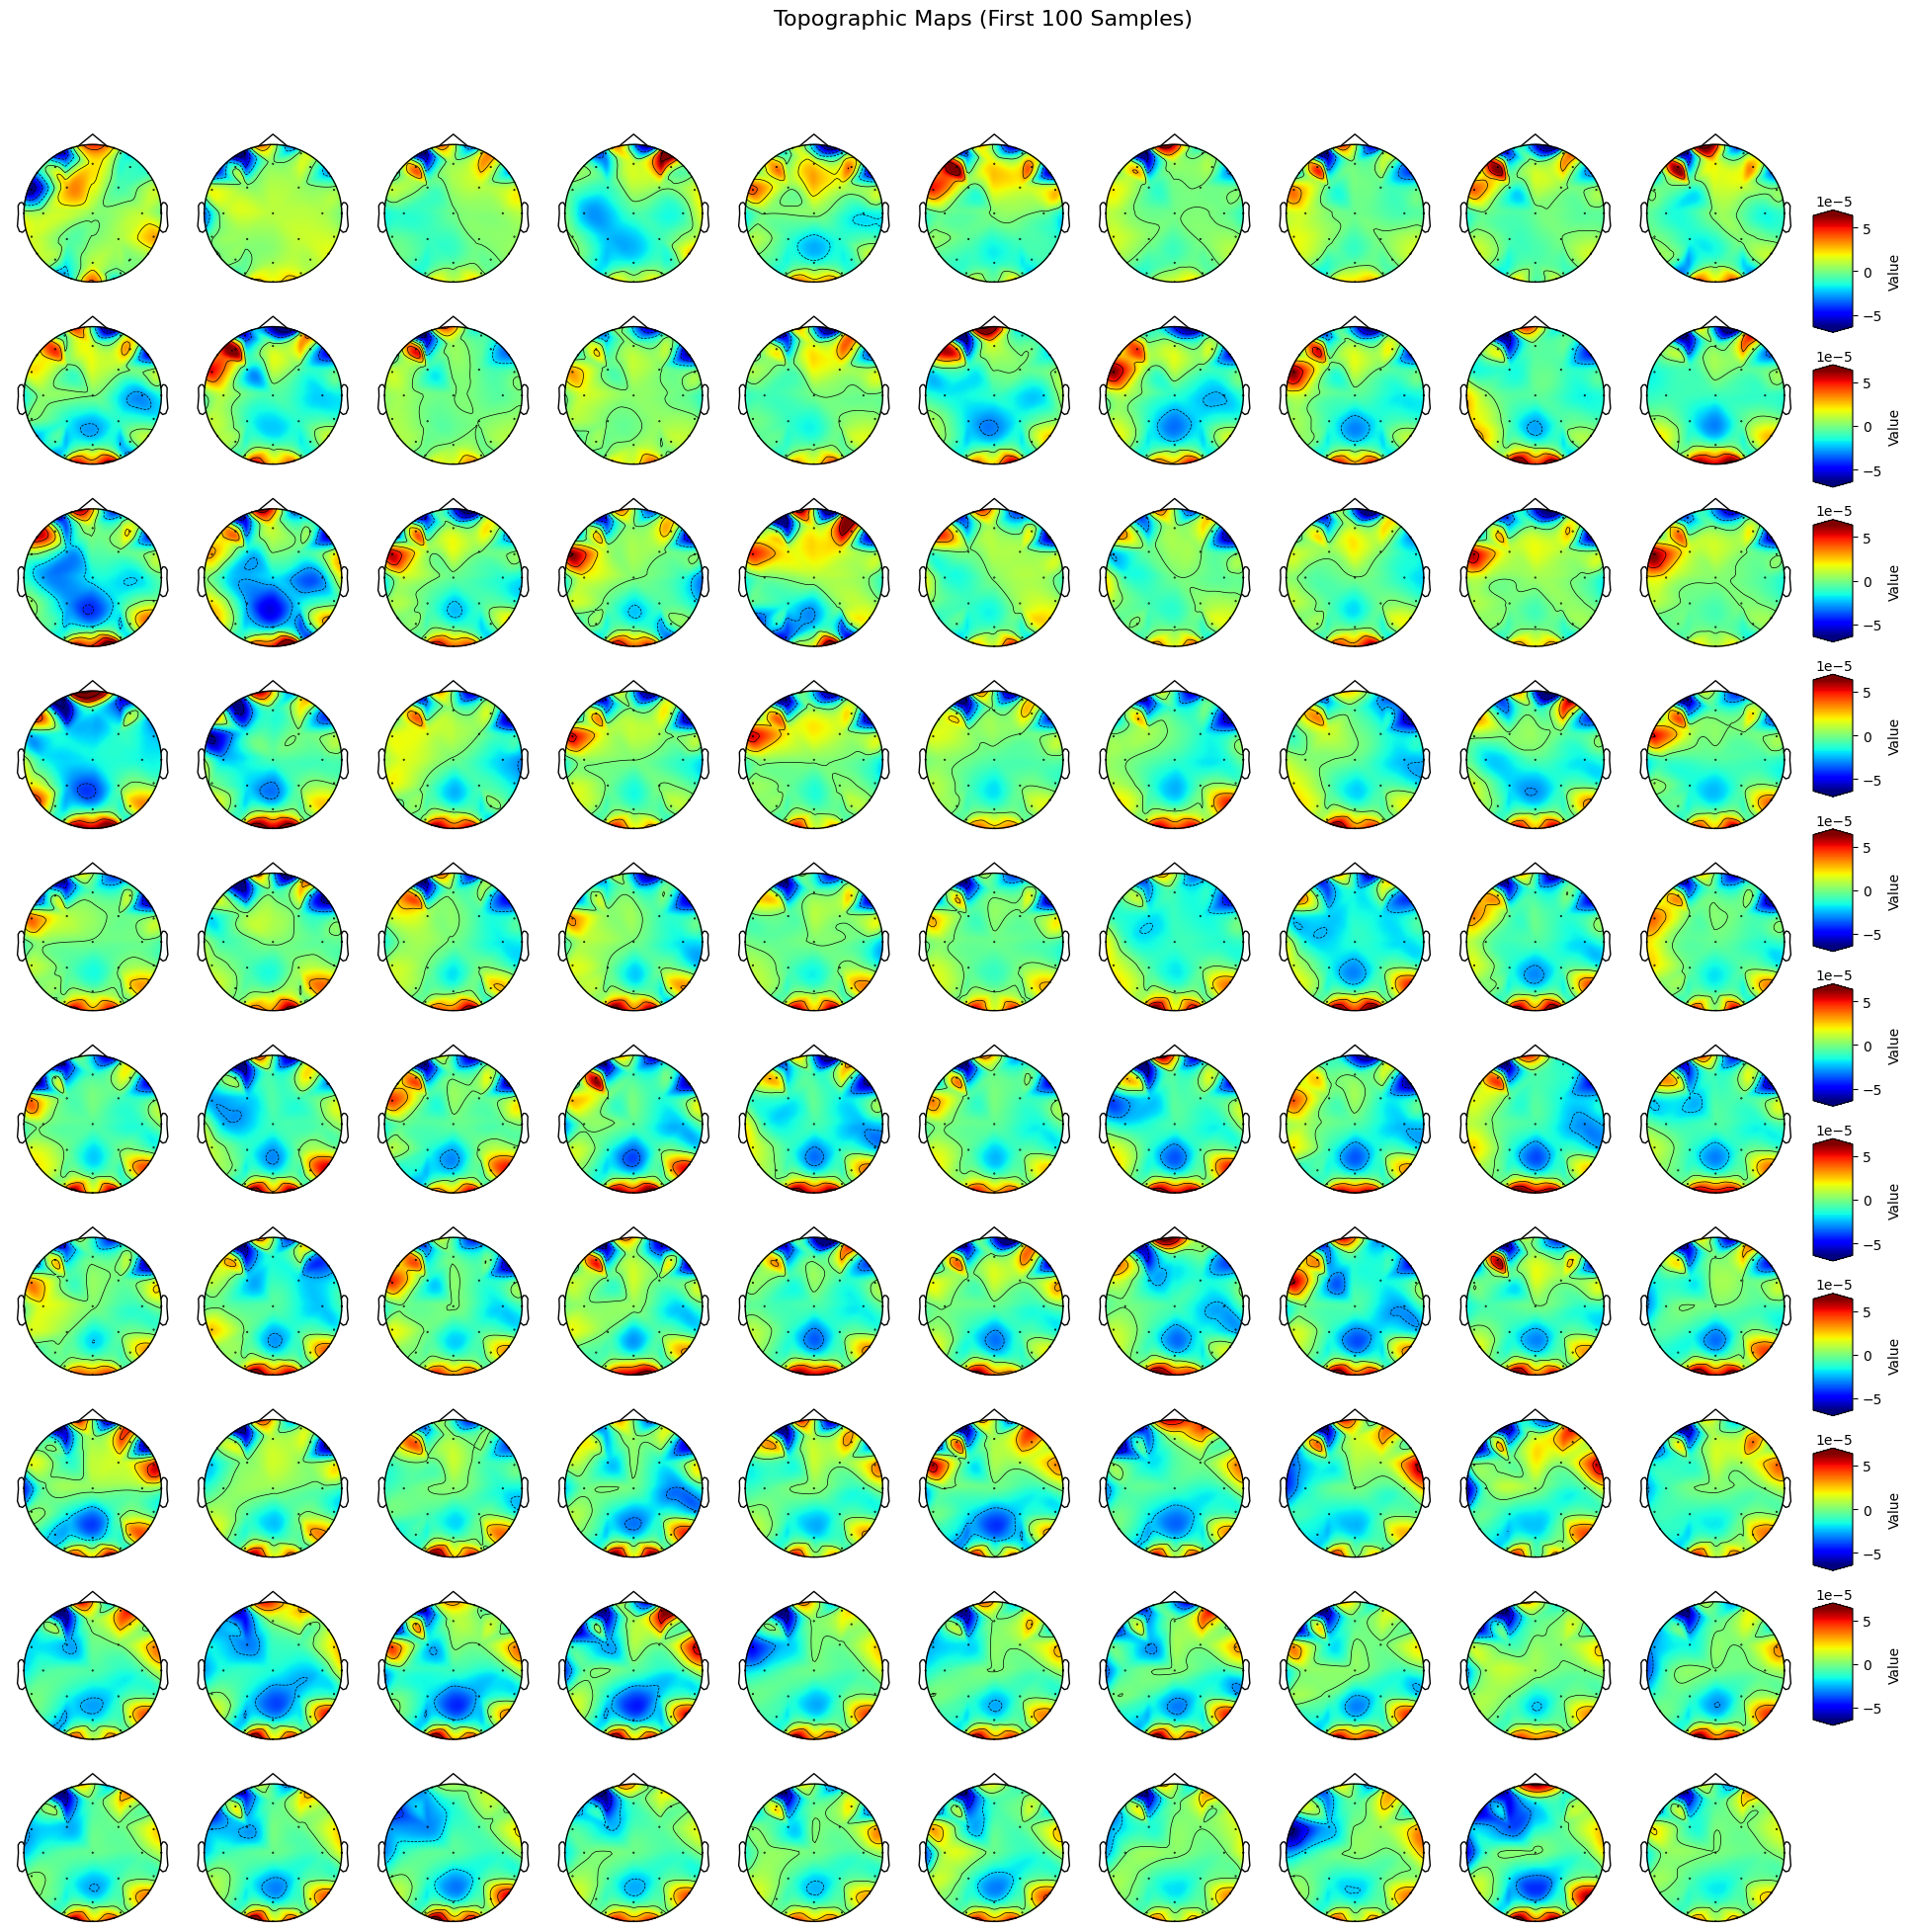

Plot saved: /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p15/first100maps_dim.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

save_dir = "/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)


# Read dataset and generate Topographic Maps to train the autoencoder with listOfTopographicMapsForAE
rawDataset, rawDatasetForMontageLocation = readDataset(verbose=False)

# Extract the values of those pixels at the 32 coordinates from an interpolated topographic map
channelNames = getChannelNames()

# List to store the topographic maps
listOfTopographicMapsForAE = []

# Prepare a grid for displaying the first 40 topographic maps
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
fig.suptitle('Topographic Maps (First 100 Samples)', fontsize=16)

# Keep track of the maximum and minimum values for consistent color bars
vmin, vmax = None, None

for idx, i in enumerate(range(StartingSamplePoint, StartingSamplePoint + 100)):
    # Get the sample and load its 32 values
    channelValuesForCurrentSample = list(rawDataset[i, :])

    # Create topographic map
    interpolatedTopographicMap, CordinateYellowRegion = createTopographicMapFromChannelValues(
        channelValuesForCurrentSample, interpolationMethod="cubic", verbose=False
    )

    # Set up MNE info object for 32 channels
    n_channels = 32
    sfreq = 1000  # Sampling frequency (arbitrary for topographic visualization)
    ch_names = channelNames[:n_channels]
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

    # Create an EvokedArray object for plotting
    data_for_mne = np.array(channelValuesForCurrentSample)[:n_channels]
    data_for_mne = np.expand_dims(data_for_mne, axis=1)  # Add the time dimension
    evoked = mne.EvokedArray(data_for_mne, info)

    # Get channel positions from the montage
    montage = mne.channels.make_standard_montage('biosemi32')
    ch_pos = montage.get_positions()['ch_pos']

    # Convert channel positions to a NumPy array
    pos = np.array([ch_pos[ch][:2] for ch in ch_names])  # Extract x, y positions for the desired channels

    # Plot the topographic map in the grid
    ax = axes.flat[idx]
    im, _ = mne.viz.plot_topomap(data_for_mne.flatten(), pos=pos, axes=ax, show=False, cmap='jet')  # Use 'pos' instead of 'ch_pos'

    # Hide axes for a cleaner grid display
    ax.axis('off')

    # Update vmin and vmax for consistent color bars across the row
    if vmin is None or vmax is None:
        vmin, vmax = im.get_clim()
    else:
        current_vmin, current_vmax = im.get_clim()
        vmin = min(vmin, current_vmin)
        vmax = max(vmax, current_vmax)

# Add a color bar at the end of each row
for row in range(10):
    cbar_ax = fig.add_axes([
        axes[row, -1].get_position().x1 + 0.02,  # x position (to the right of the last column)
        axes[row, 0].get_position().y0,          # y position (aligned with the row)
        0.02,                                    # width of the color bar
        axes[row, 0].get_position().height       # height of the color bar
    ])
    fig.colorbar(im, cax=cbar_ax, orientation='vertical', label='Value', extend='both')
    im.set_clim(vmin, vmax)  # Ensure consistent scale across the row

plt.tight_layout(rect=[0, 0, 0.92, 0.95])  # Adjust rect to leave space for color bars
# Save the figure to Google Drive
save_path = os.path.join(save_dir, f'first100maps_dim.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved: {save_path}")



### Random 100

Extracting EDF parameters from /content/drive/MyDrive/Masters Dataset/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
(41, 97792)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16897 samples (33.002 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Length of data: 24448


<ipython-input-181-8b23f518ee51>:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.95])  # Adjust rect to leave space for color bars


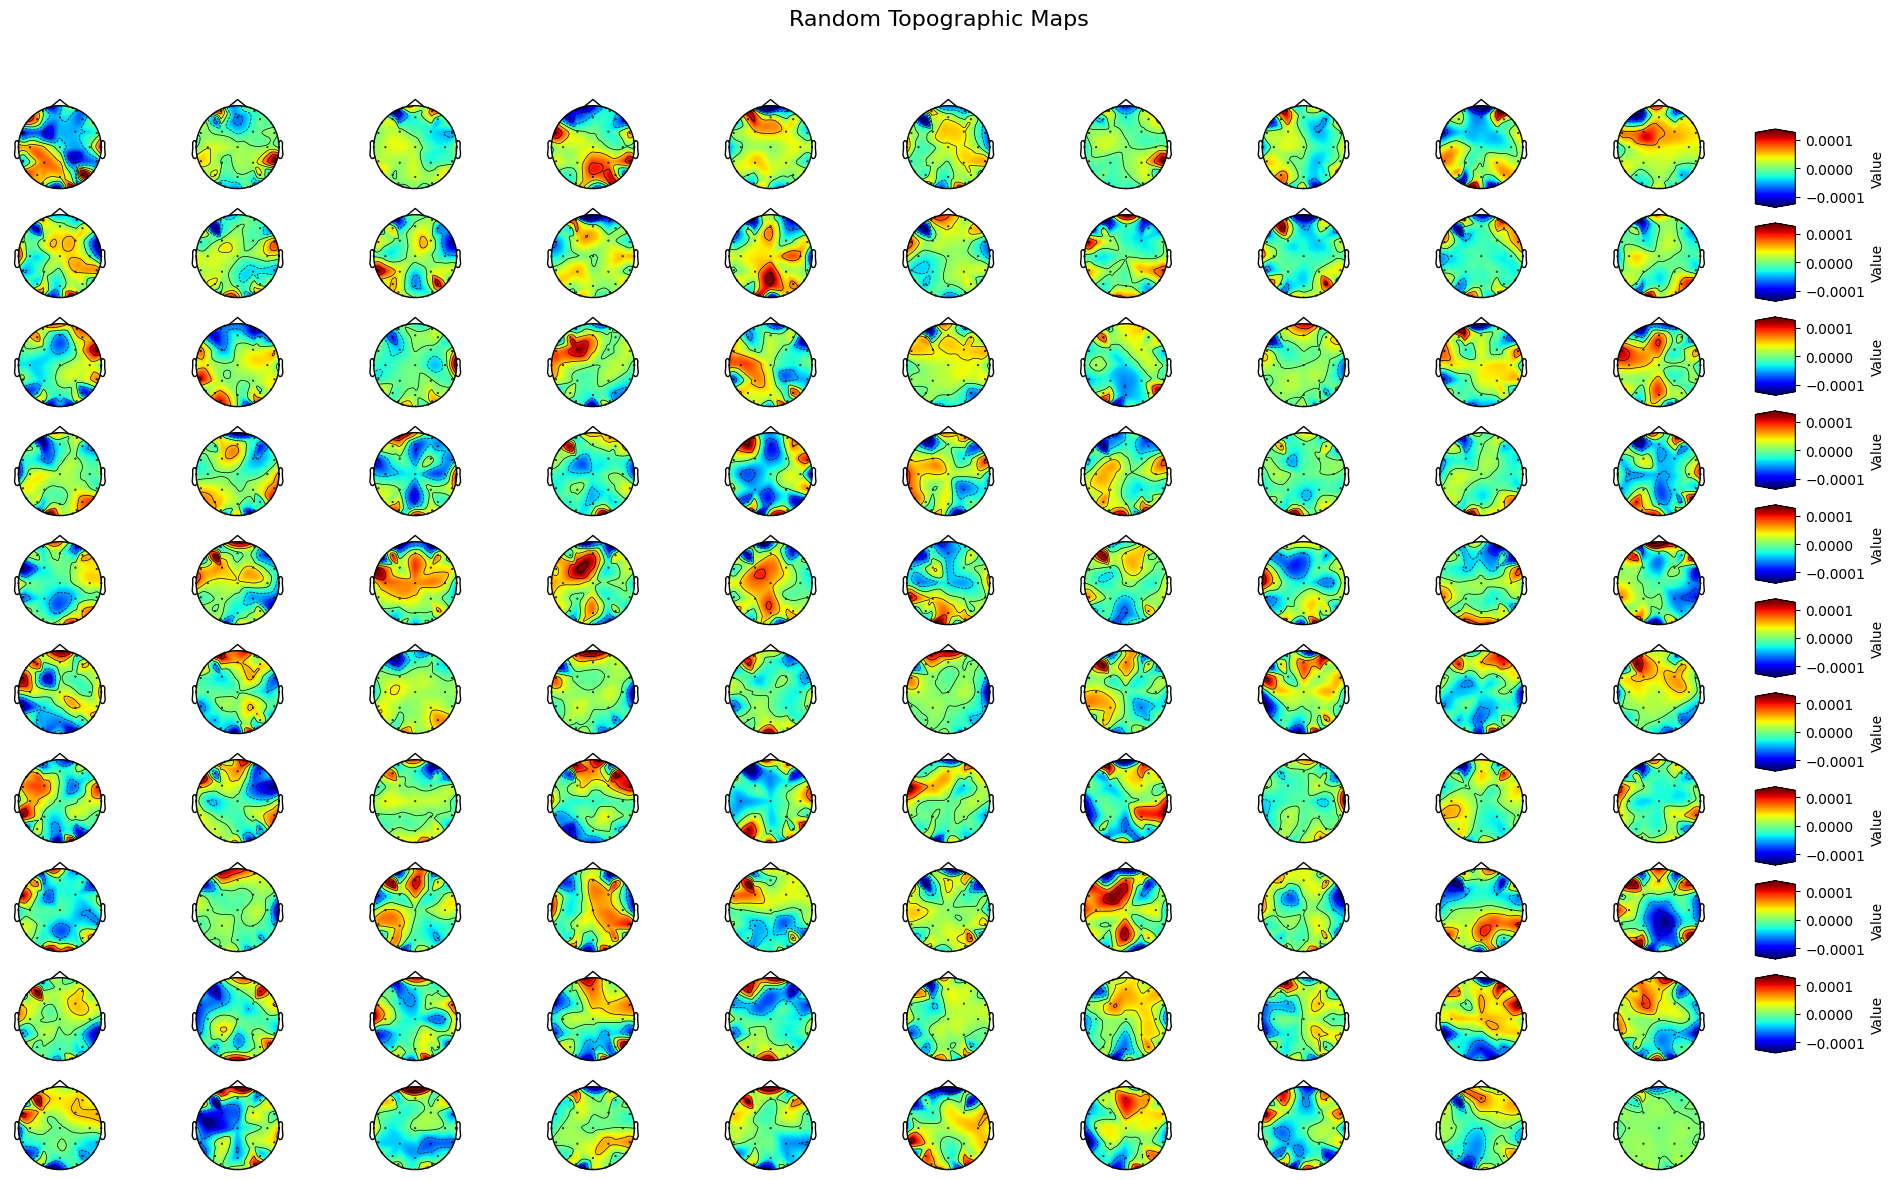

Plot saved: /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p15/random100maps.png


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import mne

# Read dataset and generate Topographic Maps to train the autoencoder with listOfTopographicMapsForAE
rawDataset, rawDatasetForMontageLocation = readDataset(verbose=False)

# Extract the values of those pixels at the 32 coordinates from an interpolated topographic map
channelNames = getChannelNames()

# List to store the topographic maps
listOfTopographicMapsForAE = []

# Generate 20 random samples within the specified range
randomSampleIndices = random.sample(range(StartingSamplePoint, EndSamplePoint), 100)

# Prepare a grid for displaying 20 topographic maps
fig, axes = plt.subplots(10, 10, figsize=(20, 12))
fig.suptitle('Random Topographic Maps', fontsize=16)

# Keep track of the maximum and minimum values for consistent color bars
vmin, vmax = None, None

for idx, i in enumerate(randomSampleIndices):
    # Get a random sample and load its 32 values
    channelValuesForCurrentSample = list(rawDataset[i, :])

    # Create topographic map
    interpolatedTopographicMap, CordinateYellowRegion = createTopographicMapFromChannelValues(
        channelValuesForCurrentSample, interpolationMethod="cubic", verbose=False
    )

    # Set up MNE info object for 32 channels
    n_channels = 32
    sfreq = 1000  # Sampling frequency (arbitrary for topographic visualization)
    ch_names = channelNames[:n_channels]
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

    # Create an EvokedArray object for plotting
    data_for_mne = np.array(channelValuesForCurrentSample)[:n_channels]
    data_for_mne = np.expand_dims(data_for_mne, axis=1)  # Add the time dimension
    evoked = mne.EvokedArray(data_for_mne, info)

    # Get channel positions from the montage
    montage = mne.channels.make_standard_montage('biosemi32')
    ch_pos = montage.get_positions()['ch_pos']

    # Convert channel positions to a NumPy array
    pos = np.array([ch_pos[ch][:2] for ch in ch_names])  # Extract x, y positions for the desired channels

    # Plot the topographic map in the grid
    ax = axes.flat[idx]
    im, _ = mne.viz.plot_topomap(data_for_mne.flatten(), pos=pos, axes=ax, show=False, cmap='jet')  # Use 'pos' instead of 'ch_pos'

    # Hide axes for a cleaner grid display
    ax.axis('off')

    # Update vmin and vmax for consistent color bars across the row
    if vmin is None or vmax is None:
        vmin, vmax = im.get_clim()
    else:
        current_vmin, current_vmax = im.get_clim()
        vmin = min(vmin, current_vmin)
        vmax = max(vmax, current_vmax)

# Add a color bar at the end of each row
for row in range(10):
    cbar_ax = fig.add_axes([
        axes[row, -1].get_position().x1 + 0.02,  # x position (to the right of the last column)
        axes[row, 0].get_position().y0,          # y position (aligned with the row)
        0.02,                                    # width of the color bar
        axes[row, 0].get_position().height       # height of the color bar
    ])
    fig.colorbar(im, cax=cbar_ax, orientation='vertical', label='Value', extend='both')
    im.set_clim(vmin, vmax)  # Ensure consistent scale across the row

plt.tight_layout(rect=[0, 0, 0.92, 0.95])  # Adjust rect to leave space for color bars
 # Adjust rect to leave space for color bars
    # Save the figure to Google Drive
save_path = os.path.join(save_dir, f'random100maps.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved: {save_path}")



### Histogram of Pixel Values

Extracting EDF parameters from /content/drive/MyDrive/Masters Dataset/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
(41, 97792)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16897 samples (33.002 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Length of data: 24448


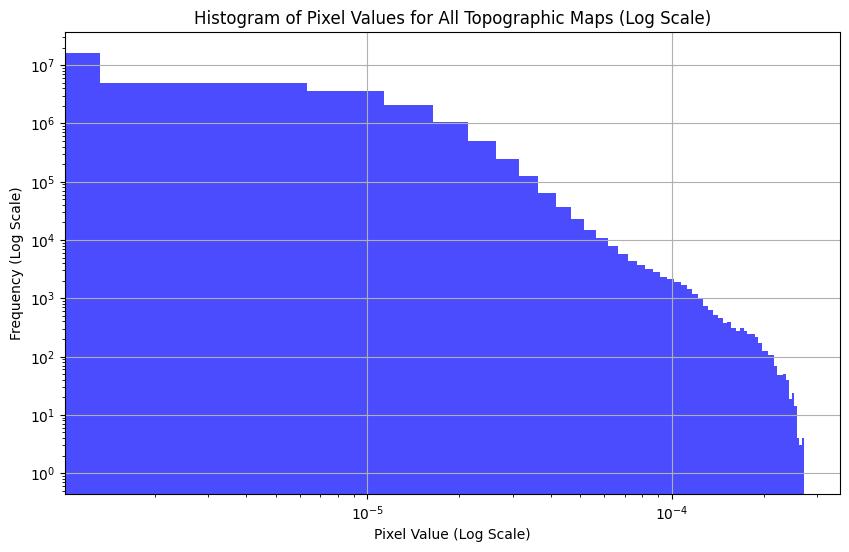

Plot saved: /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p15/hist1.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Read dataset and generate Topographic Maps to train the autoencoder with listOfTopographicMapsForAE
rawDataset, rawDatasetForMontageLocation = readDataset(verbose=False)

# Extract the values of those pixels at the 32 coordinates from an interpolated topographic map
channelNames = getChannelNames()

listOfTopographicMapsForAE = []
for i in range(StartingSamplePoint, EndSamplePoint):
    # Get a random sample and load its 32 values
    channelValuesForCurrentSample = list(rawDataset[i, :])

    # Create topographic map
    interpolatedTopographicMap, CordinateYellowRegion = createTopographicMapFromChannelValues(channelValuesForCurrentSample, interpolationMethod="cubic", verbose=False)
    listOfTopographicMapsForAE.append(interpolatedTopographicMap)

# Convert list of topographic maps to a numpy array
listOfTopographicMapsForAE = np.array(listOfTopographicMapsForAE)

# Flatten all the pixel values from all topographic maps to create a histogram
flattened_pixel_values = listOfTopographicMapsForAE.flatten()

# Plot a histogram of the pixel values
plt.figure(figsize=(10, 6))
plt.hist(flattened_pixel_values, bins=100, color='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pixel Value (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Pixel Values for All Topographic Maps (Log Scale)')
plt.grid(True)

save_path = os.path.join(save_dir, f'hist1.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved: {save_path}")

# Optionally save the numpy array for future use
# np.save('/content/drive/MyDrive/Masters Dataset/Maps/Standard' + str(person), listOfTopographicMapsForAE)


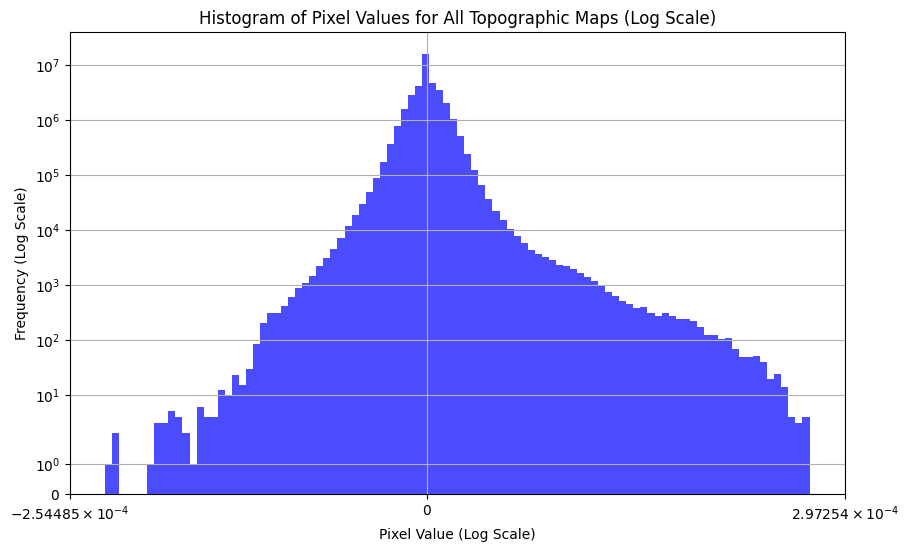

Plot saved: /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p15/hist2.png


In [ ]:
# Plot a histogram of the pixel values
plt.figure(figsize=(10, 6))
plt.hist(flattened_pixel_values, bins=100, color='blue', alpha=0.7)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel('Pixel Value (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Pixel Values for All Topographic Maps (Log Scale)')
plt.grid(True)
save_path = os.path.join(save_dir, f'hist2.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved: {save_path}")

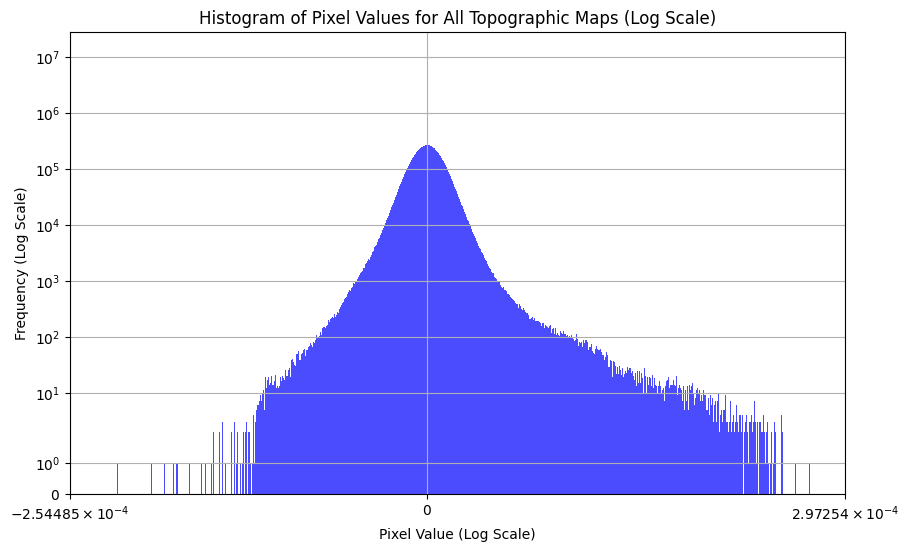

Plot saved: /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p15/hist3.png


In [ ]:
# Plot a histogram of the pixel values
plt.figure(figsize=(10, 6))
plt.hist(flattened_pixel_values, bins=2000, color='blue', alpha=0.7)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel('Pixel Value (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Pixel Values for All Topographic Maps (Log Scale)')
plt.grid(True)
save_path = os.path.join(save_dir, f'hist3.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved: {save_path}")

#DCEC with joint training

In [ ]:
from sklearn.model_selection import train_test_split

# Load your data
raw = listOfTopographicMapsForAE
print(raw.shape)

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Normalize the data
dataNorm = (raw - raw.min()) / (raw.max() - raw.min())
dataNormReshape = dataNorm.reshape(-1, raw.shape[1], raw.shape[2], 1)

# Split the data into training, validation, and test sets
data_train, data_remaining = train_test_split(
    dataNormReshape, test_size=(1 - train_ratio), random_state=42, shuffle=True
)
data_val, data_test = train_test_split(
    data_remaining,
    test_size=test_ratio / (test_ratio + val_ratio),
    random_state=42,
    shuffle=True,
)

(24448, 40, 40)


## V3

Training DCEC with z_dim=40 and n_clusters=2...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 0.0038 - mmd_loss: 0.0000e+00 - nll_loss: 6.2328e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4009e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.3674e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2082e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.9106e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6284e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.3212e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6069e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.3567e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1612e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9572e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7701e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.5940e-05
Epoch 8/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5852e-05 - mmd_loss: 0.0000e+00 - n

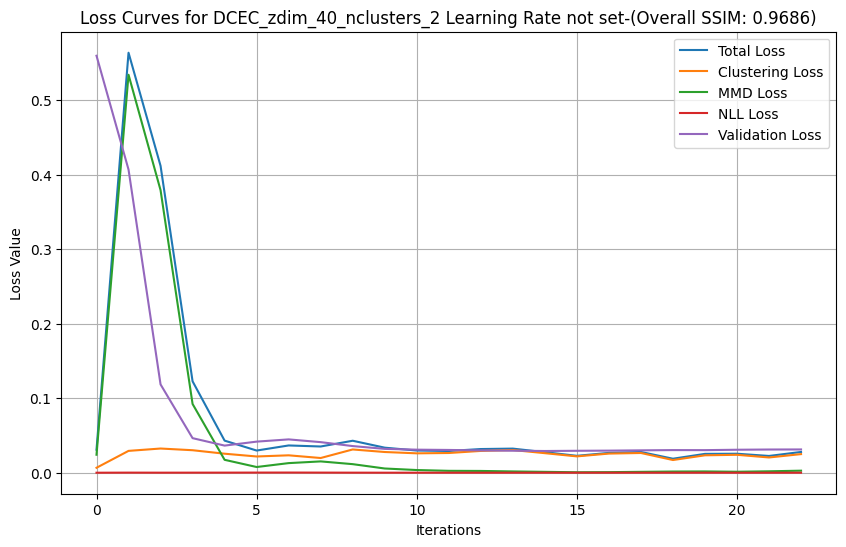

Model saved for z_dim=40 and n_clusters=2
Complete model saved for z_dim=40 and n_clusters=2
Model saved for z_dim=40 and n_clusters=2
Training DCEC with z_dim=40 and n_clusters=3...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0037 - mmd_loss: 0.0000e+00 - nll_loss: 6.7294e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6948e-04 - mmd_loss: 0.0000e+00 - nll_loss: 4.6945e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4958e-04 - mmd_loss: 0.0000e+00 - nll_loss: 2.4524e-04
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8583e-05 - mmd_loss: 0.0000e+00 - nll_loss: 5.5291e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3216e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0874e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4283e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.2279e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0248e-05 - mmd_los

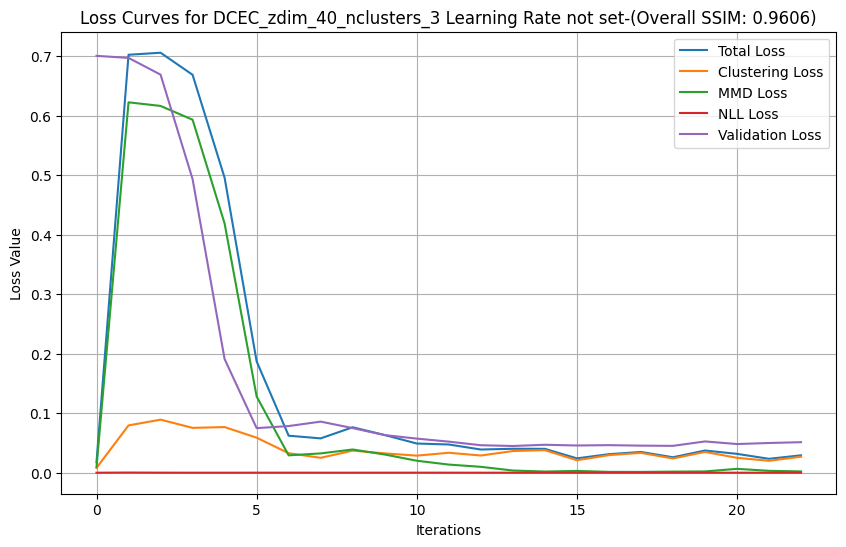

Model saved for z_dim=40 and n_clusters=3
Complete model saved for z_dim=40 and n_clusters=3
Model saved for z_dim=40 and n_clusters=3
Training DCEC with z_dim=40 and n_clusters=4...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0039 - mmd_loss: 0.0000e+00 - nll_loss: 6.5035e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7579e-04 - mmd_loss: 0.0000e+00 - nll_loss: 4.7579e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6936e-04 - mmd_loss: 0.0000e+00 - nll_loss: 4.6936e-04
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6799e-04 - mmd_loss: 0.0000e+00 - nll_loss: 4.6800e-04
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7181e-04 - mmd_loss: 0.0000e+00 - nll_loss: 4.7181e-04
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7696e-04 - mmd_loss: 0.0000e+00 - nll_loss: 4.7696e-04
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7688e-04 - mmd_los

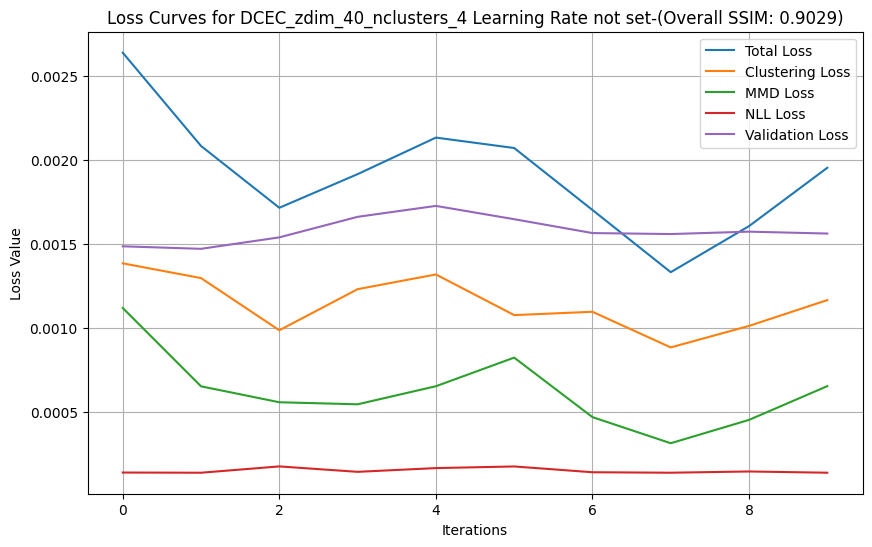

Model saved for z_dim=40 and n_clusters=4


Complete model saved for z_dim=40 and n_clusters=4
Model saved for z_dim=40 and n_clusters=4
Training DCEC with z_dim=40 and n_clusters=5...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0037 - mmd_loss: 0.0000e+00 - nll_loss: 6.0895e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2315e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.1990e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2900e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.9203e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2939e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0360e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5067e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.2911e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1565e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9519e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8435e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.6512e-05
Epoch

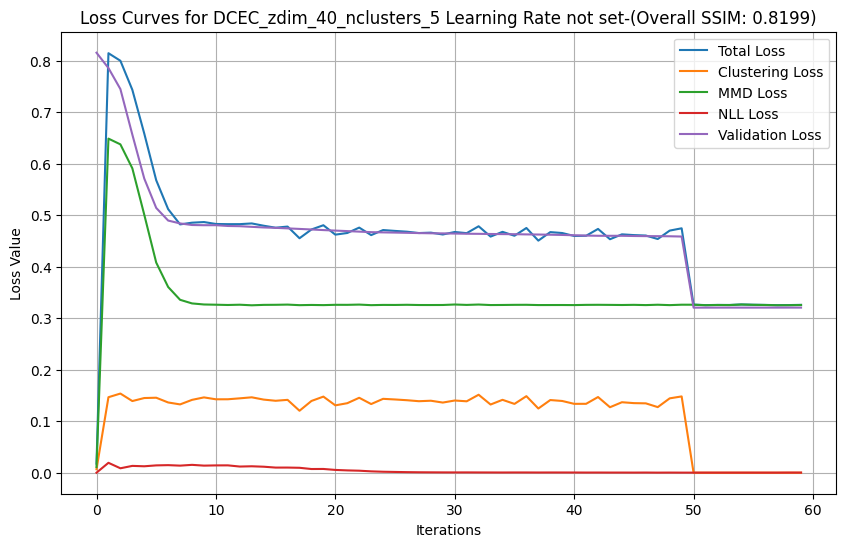

Model saved for z_dim=40 and n_clusters=5
Complete model saved for z_dim=40 and n_clusters=5
Model saved for z_dim=40 and n_clusters=5
Training DCEC with z_dim=40 and n_clusters=6...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.0037 - mmd_loss: 0.0000e+00 - nll_loss: 6.7017e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8531e-04 - mmd_loss: 0.0000e+00 - nll_loss: 3.8280e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.3658e-05 - mmd_loss: 0.0000e+00 - nll_loss: 6.9367e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1973e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.8808e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9579e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.6870e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4358e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.1836e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0652e-05 - mmd_los

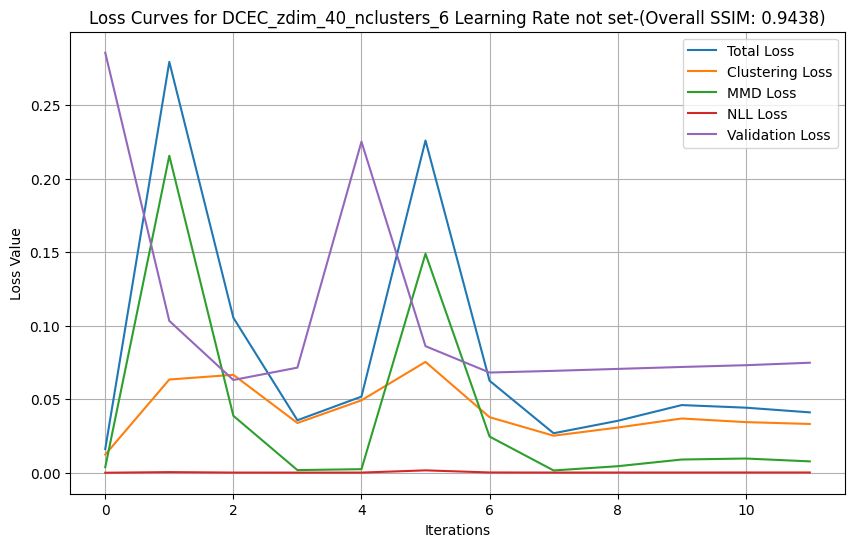

Model saved for z_dim=40 and n_clusters=6
Complete model saved for z_dim=40 and n_clusters=6
Model saved for z_dim=40 and n_clusters=6
Training DCEC with z_dim=40 and n_clusters=7...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0038 - mmd_loss: 0.0000e+00 - nll_loss: 6.5062e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2701e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.2385e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0193e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.7350e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3324e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0853e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5650e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.3401e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1960e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9926e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8097e-05 - mmd_los

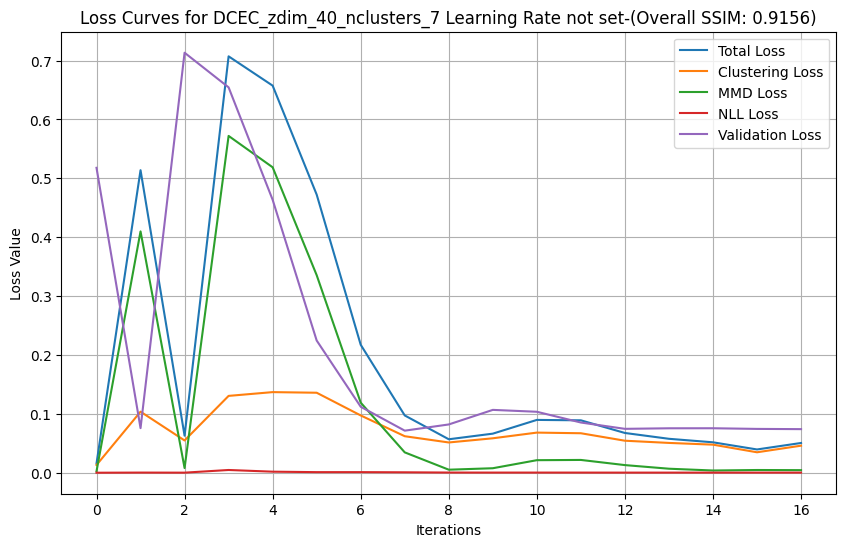

Model saved for z_dim=40 and n_clusters=7
Complete model saved for z_dim=40 and n_clusters=7
Model saved for z_dim=40 and n_clusters=7
Training DCEC with z_dim=40 and n_clusters=8...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0037 - mmd_loss: 0.0000e+00 - nll_loss: 6.5331e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4610e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.4269e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5484e-05 - mmd_loss: 0.0000e+00 - nll_loss: 5.2451e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6172e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.3457e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6566e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.4399e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1628e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9564e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9236e-05 - mmd_los

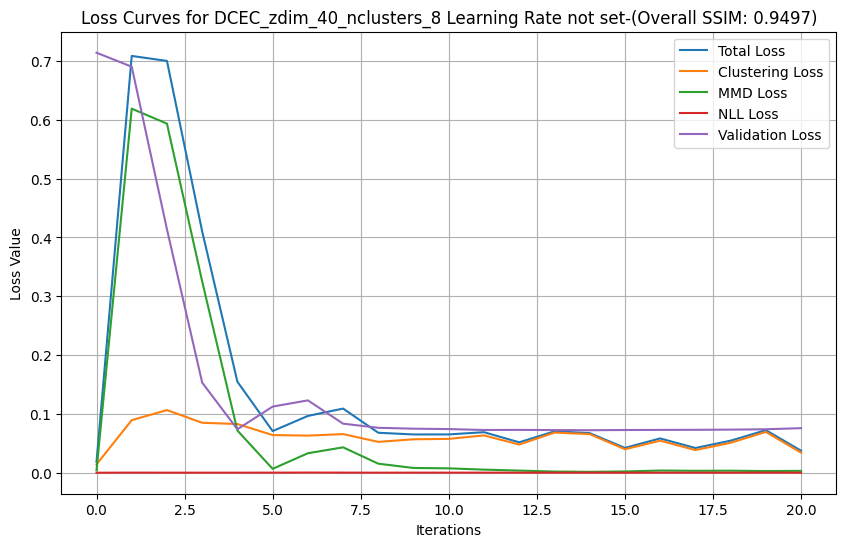

Model saved for z_dim=40 and n_clusters=8
Complete model saved for z_dim=40 and n_clusters=8
Model saved for z_dim=40 and n_clusters=8
Training DCEC with z_dim=40 and n_clusters=9...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0039 - mmd_loss: 0.0000e+00 - nll_loss: 6.1345e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3534e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.3232e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3208e-05 - mmd_loss: 0.0000e+00 - nll_loss: 5.0166e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3501e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0946e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5399e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.3225e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0388e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.8573e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7503e-05 - mmd_los

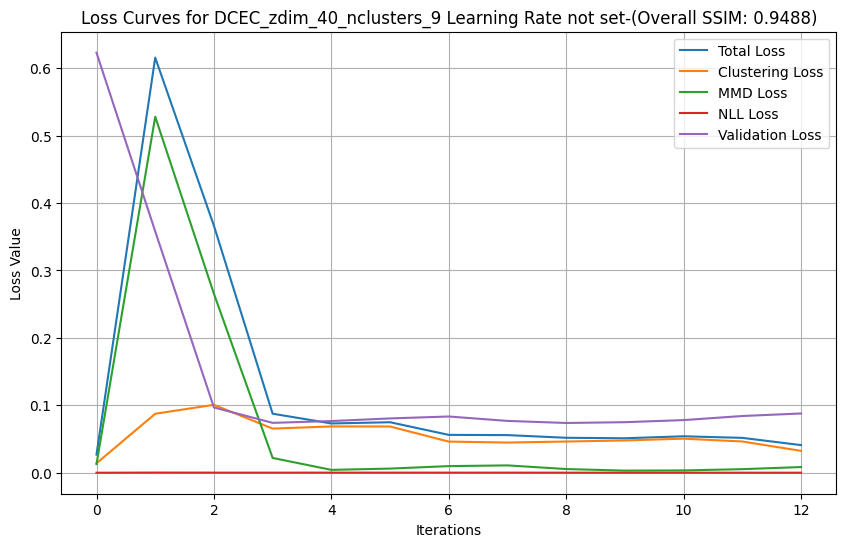

Model saved for z_dim=40 and n_clusters=9
Complete model saved for z_dim=40 and n_clusters=9
Model saved for z_dim=40 and n_clusters=9
Training DCEC with z_dim=40 and n_clusters=10...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0036 - mmd_loss: 0.0000e+00 - nll_loss: 6.6540e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0844e-04 - mmd_loss: 0.0000e+00 - nll_loss: 2.0513e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8410e-05 - mmd_loss: 0.0000e+00 - nll_loss: 5.5199e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5387e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.2920e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7048e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.4609e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1427e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9383e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7686e-05 - mmd_lo

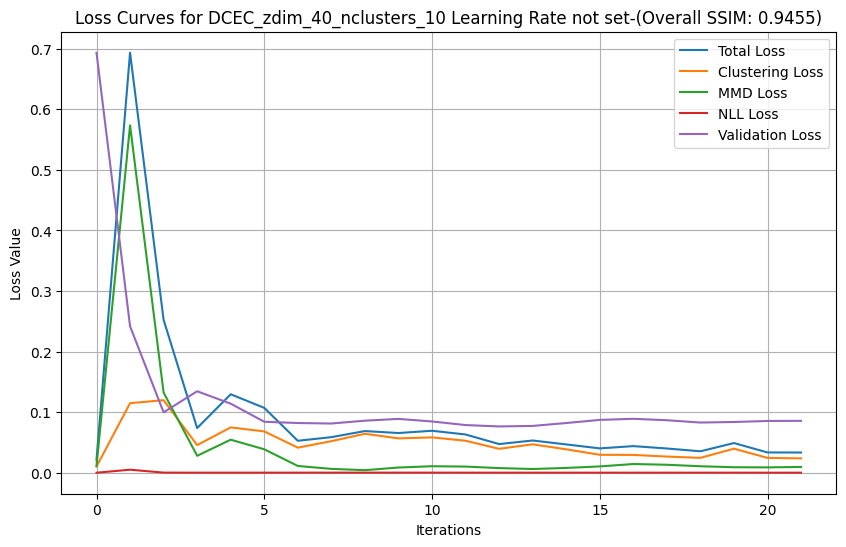

Model saved for z_dim=40 and n_clusters=10
Complete model saved for z_dim=40 and n_clusters=10
Model saved for z_dim=40 and n_clusters=10
Training DCEC with z_dim=40 and n_clusters=11...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0038 - mmd_loss: 0.0000e+00 - nll_loss: 6.3671e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1492e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.1169e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7935e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.4989e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3353e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0552e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4958e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.2795e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0376e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.8395e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7065e-05 - mmd

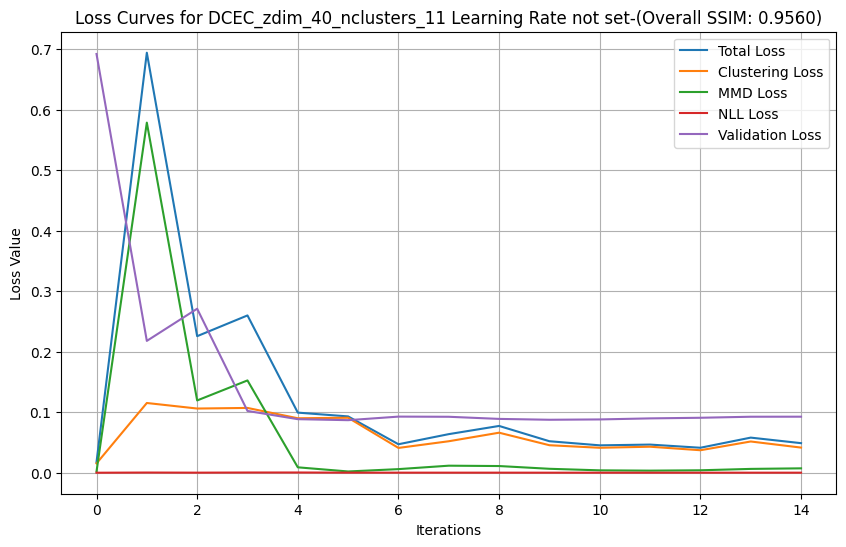

Model saved for z_dim=40 and n_clusters=11
Complete model saved for z_dim=40 and n_clusters=11
Model saved for z_dim=40 and n_clusters=11
Training DCEC with z_dim=40 and n_clusters=12...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0040 - mmd_loss: 0.0000e+00 - nll_loss: 6.3560e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1394e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.1080e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9025e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.6118e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3190e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0550e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5118e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.2756e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2001e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9738e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9654e-05 - mmd

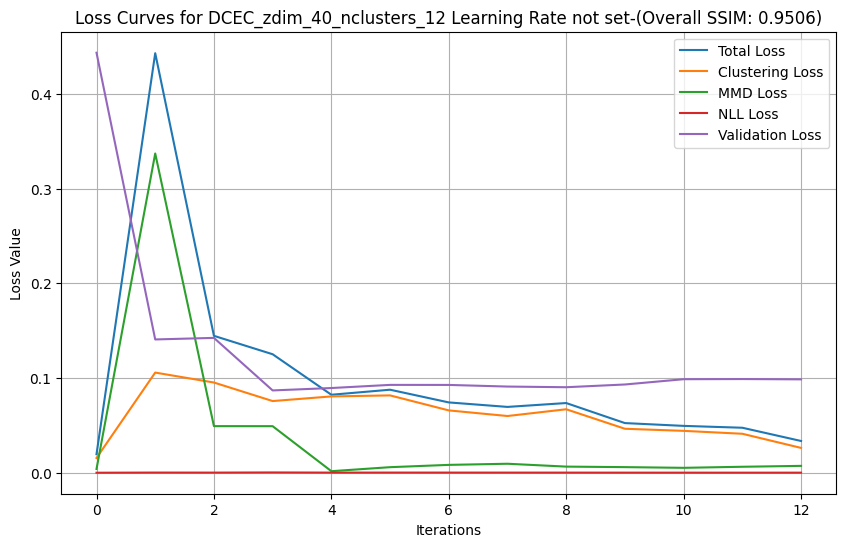

Model saved for z_dim=40 and n_clusters=12


Complete model saved for z_dim=40 and n_clusters=12
Model saved for z_dim=40 and n_clusters=12
Training DCEC with z_dim=40 and n_clusters=13...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0038 - mmd_loss: 0.0000e+00 - nll_loss: 6.7363e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6124e-04 - mmd_loss: 0.0000e+00 - nll_loss: 2.5683e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9891e-05 - mmd_loss: 0.0000e+00 - nll_loss: 5.6447e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8255e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.5409e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6986e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.4729e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2909e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.0683e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9253e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.7158e-05
Ep

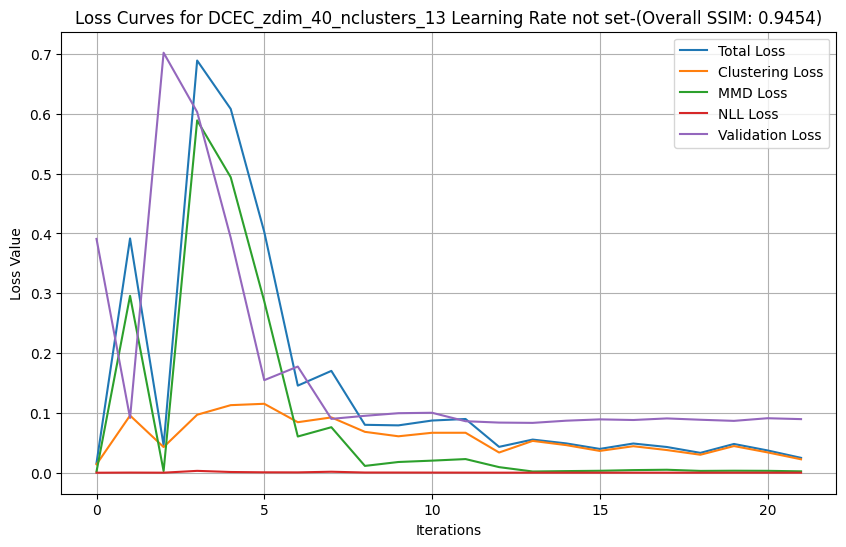

Model saved for z_dim=40 and n_clusters=13
Complete model saved for z_dim=40 and n_clusters=13
Model saved for z_dim=40 and n_clusters=13
Training DCEC with z_dim=40 and n_clusters=14...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0037 - mmd_loss: 0.0000e+00 - nll_loss: 6.7137e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6614e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.6288e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4087e-05 - mmd_loss: 0.0000e+00 - nll_loss: 5.0888e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4868e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.2186e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5416e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.3199e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0552e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.8541e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8084e-05 - mmd

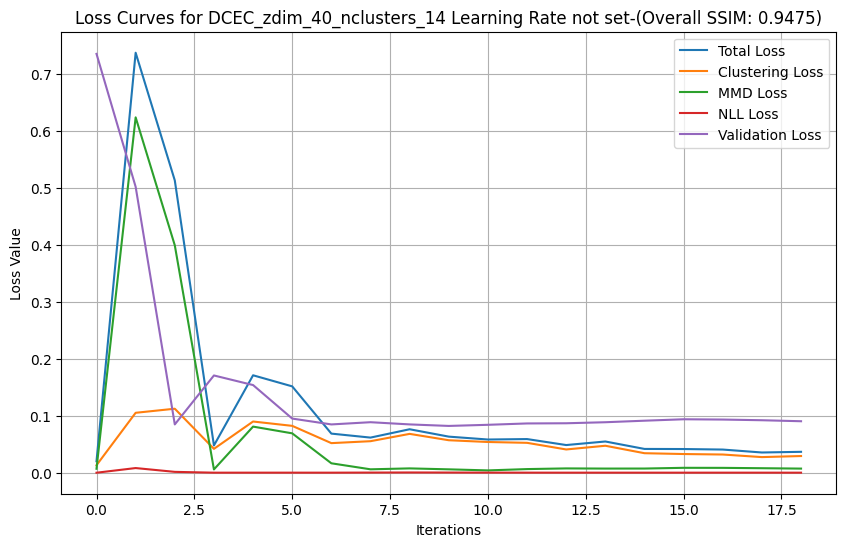

Model saved for z_dim=40 and n_clusters=14
Complete model saved for z_dim=40 and n_clusters=14
Model saved for z_dim=40 and n_clusters=14
Training DCEC with z_dim=40 and n_clusters=15...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0036 - mmd_loss: 0.0000e+00 - nll_loss: 6.5322e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4227e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.3914e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2998e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.9870e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3247e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0777e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6512e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.4128e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1304e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9218e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8274e-05 - mmd

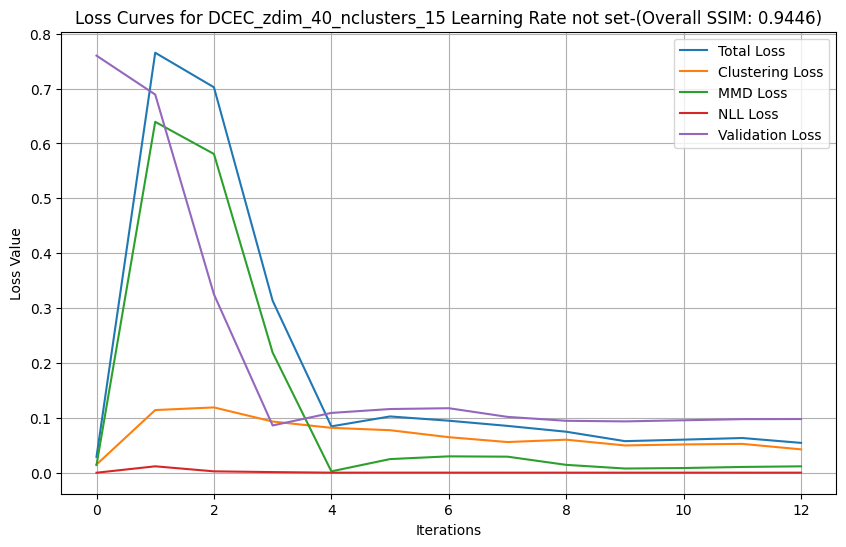

Model saved for z_dim=40 and n_clusters=15
Complete model saved for z_dim=40 and n_clusters=15
Model saved for z_dim=40 and n_clusters=15
Training DCEC with z_dim=40 and n_clusters=16...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0036 - mmd_loss: 0.0000e+00 - nll_loss: 6.4822e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2738e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.2399e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2732e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.9317e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3954e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.1314e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6164e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.3868e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1580e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9524e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8254e-05 - mmd

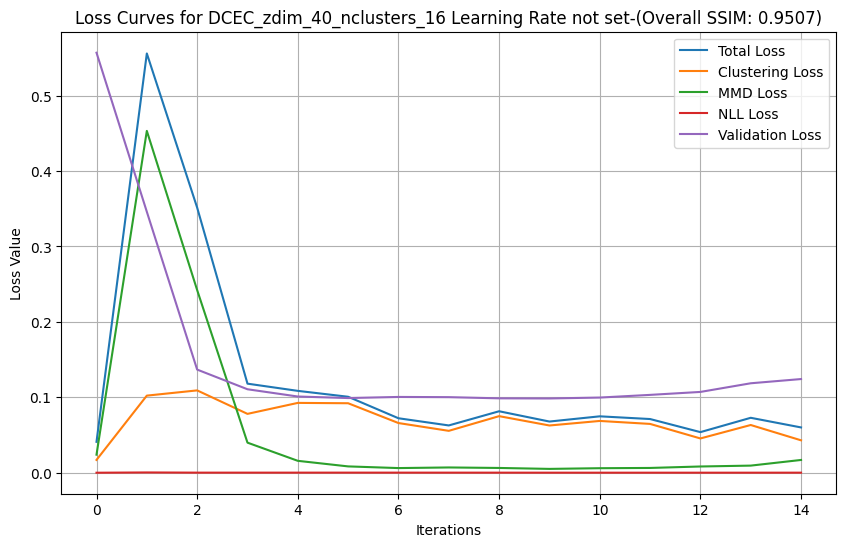

Model saved for z_dim=40 and n_clusters=16
Complete model saved for z_dim=40 and n_clusters=16
Model saved for z_dim=40 and n_clusters=16
Training DCEC with z_dim=40 and n_clusters=17...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0037 - mmd_loss: 0.0000e+00 - nll_loss: 6.5843e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5076e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.4755e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2094e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.9052e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4847e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.1899e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5698e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.3426e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1224e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.9163e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8491e-05 - mmd

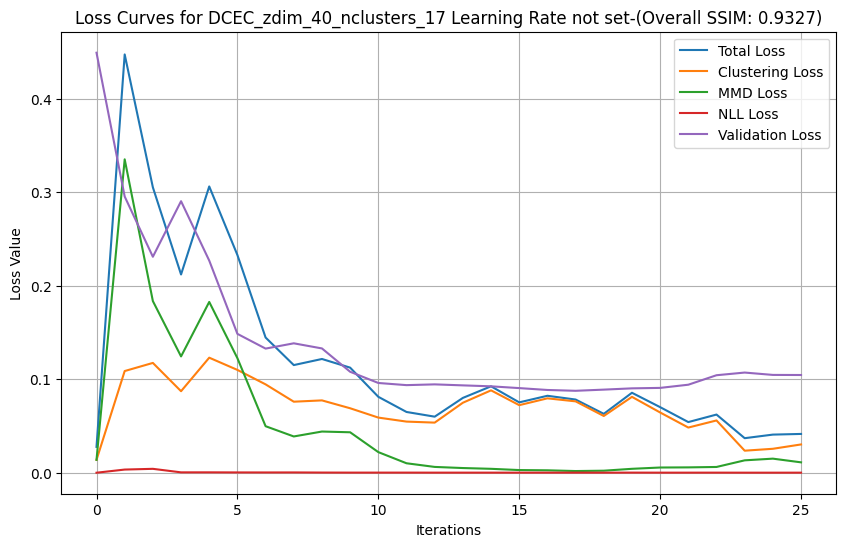

Model saved for z_dim=40 and n_clusters=17
Complete model saved for z_dim=40 and n_clusters=17
Model saved for z_dim=40 and n_clusters=17
Training DCEC with z_dim=40 and n_clusters=18...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0038 - mmd_loss: 0.0000e+00 - nll_loss: 6.4207e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2204e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.1875e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9083e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.6029e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1545e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.9104e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4644e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.2456e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0750e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.8682e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7467e-05 - mmd

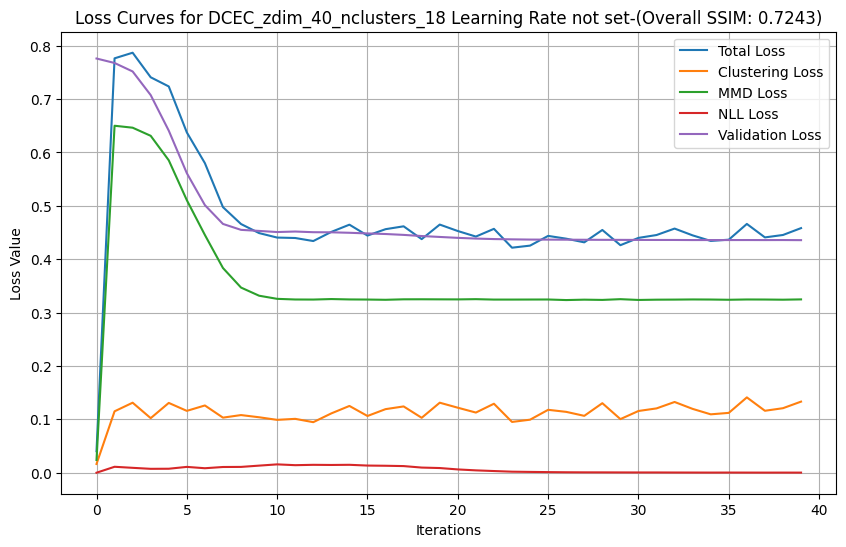

Model saved for z_dim=40 and n_clusters=18
Complete model saved for z_dim=40 and n_clusters=18
Model saved for z_dim=40 and n_clusters=18
Training DCEC with z_dim=40 and n_clusters=19...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0040 - mmd_loss: 0.0000e+00 - nll_loss: 6.9788e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7422e-04 - mmd_loss: 0.0000e+00 - nll_loss: 4.7421e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8426e-04 - mmd_loss: 0.0000e+00 - nll_loss: 3.8247e-04
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.8179e-05 - mmd_loss: 0.0000e+00 - nll_loss: 6.4927e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8893e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.6233e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6406e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.4275e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1822e-05 - mmd

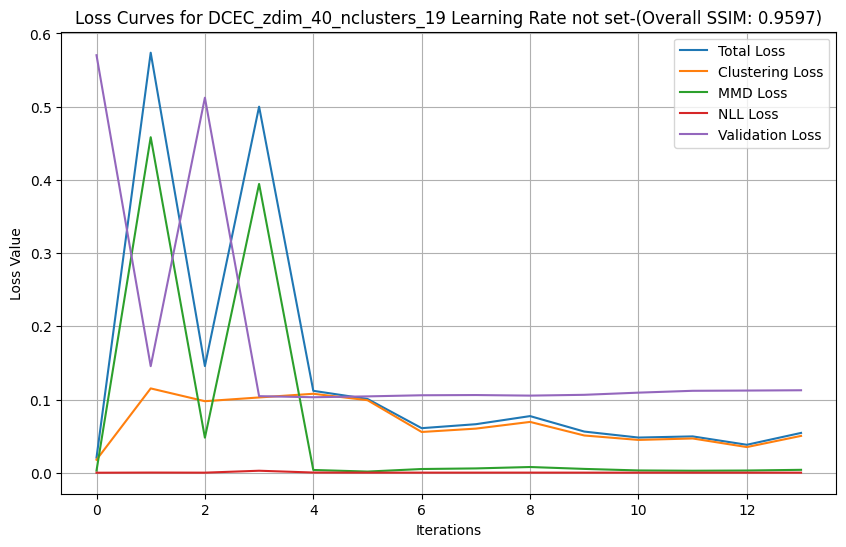

Model saved for z_dim=40 and n_clusters=19
Complete model saved for z_dim=40 and n_clusters=19
Model saved for z_dim=40 and n_clusters=19
Training DCEC with z_dim=40 and n_clusters=20...
...Pretraining autoencoder...
Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0036 - mmd_loss: 0.0000e+00 - nll_loss: 6.1788e-04
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2135e-04 - mmd_loss: 0.0000e+00 - nll_loss: 1.1782e-04
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9471e-05 - mmd_loss: 0.0000e+00 - nll_loss: 4.6468e-05
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3369e-05 - mmd_loss: 0.0000e+00 - nll_loss: 3.0790e-05
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3804e-05 - mmd_loss: 0.0000e+00 - nll_loss: 2.1805e-05
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0895e-05 - mmd_loss: 0.0000e+00 - nll_loss: 1.8858e-05
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9855e-05 - mmd

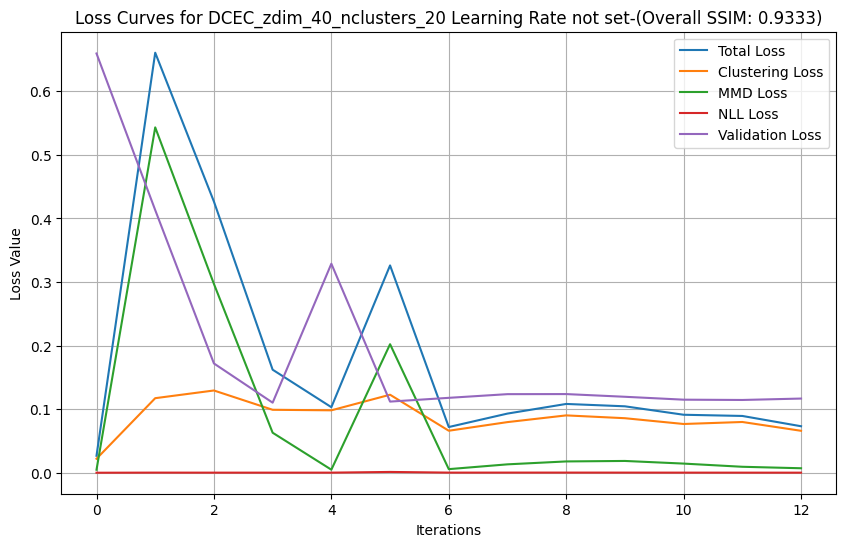

Model saved for z_dim=40 and n_clusters=20
Complete model saved for z_dim=40 and n_clusters=20
Model saved for z_dim=40 and n_clusters=20


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, InputSpec, Input, Conv2D, LeakyReLU, Flatten, Dense, Lambda, Reshape, Conv2DTranspose, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from sklearn.cluster import KMeans
import os

save_dir = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16'
#model_name = f'DCEC_zdim_{z_dim}_nclusters_{k}'

# Define ClusteringLayer
@tf.keras.utils.register_keras_serializable()
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights

    def build(self, input_shape):
        input_dim = input_shape[1]
        self.clusters = self.add_weight(
            name='clusters',
            shape=(self.n_clusters, input_dim),
            initializer='glorot_uniform'
        )
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        super(ClusteringLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
        # Expand inputs for broadcasting
        inputs_expanded = K.expand_dims(inputs, axis=1)  # (batch_size, 1, latent_dim)
        cluster_expanded = K.expand_dims(self.clusters, axis=0)  # (1, n_clusters, latent_dim)
        q = 1.0 / (
            1.0
            + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha)
        )
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q


# Define the CustomLossLayer
## MMD Functions
def compute_kernel(x, y):
    x_size = tf.shape(x)[0]
    y_size = tf.shape(y)[0]
    dim = tf.shape(x)[1]
    tiled_x = tf.tile(tf.reshape(x, tf.stack([x_size, 1, dim])), tf.stack([1, y_size, 1]))
    tiled_y = tf.tile(tf.reshape(y, tf.stack([1, y_size, dim])), tf.stack([x_size, 1, 1]))
    return tf.exp(-tf.reduce_mean(tf.square(tiled_x - tiled_y), axis=2) / tf.cast(dim, tf.float32))

def compute_mmd(x, y, sigma_sqr=1.0):
    x_kernel = compute_kernel(x, x)
    y_kernel = compute_kernel(y, y)
    xy_kernel = compute_kernel(x, y)
    return tf.reduce_mean(x_kernel) + tf.reduce_mean(y_kernel) - 2 * tf.reduce_mean(xy_kernel)

@tf.keras.utils.register_keras_serializable()
class CustomLossLayer(tf.keras.layers.Layer):
    def __init__(self, encoder, decoder, **kwargs):
        super(CustomLossLayer, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.mmd_tracker = tf.keras.metrics.Mean(name="mmd_loss")
        self.nll_tracker = tf.keras.metrics.Mean(name="nll_loss")

    def call(self, inputs):
        latent_space, train_z, train_xr, train_x = inputs
        # true_samples = tf.random.normal(tf.stack([200, z_dim]))
        loss_mmd = compute_mmd(latent_space, train_z)
        loss_nll = tf.reduce_mean(tf.square(train_xr - train_x))
        # Update the trackers
        self.mmd_tracker.update_state(loss_mmd)
        self.nll_tracker.update_state(loss_nll)

        # Add the total loss
        self.add_loss(loss_mmd + loss_nll)
        return train_xr

    def reset_states(self):  # Added for resetting at the start of each epoch
        self.mmd_tracker.reset_states()
        self.nll_tracker.reset_states()

    def compute_output_shape(self, input_shape):
        return input_shape[1]


# Define DCEC class
class DCEC:
    def __init__(self, input_shape, z_dim=40, n_clusters=20, alpha=1.0, lambda_ = 0.5, optimizer_name='adam'):
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.lambda_ = lambda_
        self.z_dim = z_dim

        # Build the encoder
        encoder_input = Input(shape=input_shape)
        encoder_input = Input(shape=(raw.shape[1], raw.shape[2],1))
        en_conv1 = Conv2D(filters = 32, kernel_size=4, strides=2, padding='same',kernel_regularizer=l2(0.005))(encoder_input)
        en_conv1 = BatchNormalization()(en_conv1)
        en_conv1 = LeakyReLU(0.1)(en_conv1)
        en_conv1 = Dropout(0.2)(en_conv1)

        en_conv2 = Conv2D(filters = 64, kernel_size=4, strides=2, padding='same')(en_conv1)
        en_conv2 = LeakyReLU(0.1)(en_conv2)
        en_conv2 = Dropout(0.2)(en_conv2)

        en_conv3 = Conv2D(filters = 128, kernel_size=4, strides=2, padding='same')(en_conv2)
        en_conv3 = LeakyReLU(0.1)(en_conv3)
        en_conv3 = Dropout(0.3)(en_conv3)

        en_conv4 = Conv2D(filters = 256, kernel_size=4, strides=2, padding='same')(en_conv3)
        en_conv4 = LeakyReLU(0.1)(en_conv4)
        en_conv4 = Dropout(0.3)(en_conv4)

        en_fc1= Flatten()(en_conv3)
        mu = Dense(z_dim)(en_fc1)
        sigma = Dense(z_dim)(en_fc1)

        #Compute latent using mean and variance
        @tf.keras.utils.register_keras_serializable(package="Custom", name="compute_latent")
        def compute_latent(x):
            mu, sigma = x
            batch = K.shape(mu)[0]
            dim = K.int_shape(mu)[1]
            eps = K.random_normal(shape=(batch,z_dim),mean=0., stddev=1.)
            return mu + K.exp(sigma)*eps
        latent_space = Lambda(compute_latent)([mu, sigma])

        self.encoder = Model(encoder_input, [mu, sigma, latent_space], name='encoder')

        # Build the decoder
        decoder_input = Input(shape=(z_dim,))
        de_fc2 = Dense(en_conv3.shape[1] * en_conv3.shape[2] * en_conv3.shape[3], activation='relu')(decoder_input)
        de_fc2 = Reshape((en_conv3.shape[1], en_conv3.shape[2], en_conv3.shape[3]))(de_fc2)
        de_conv1 = Conv2DTranspose(filters=128, kernel_size=4, strides=2, activation='relu', padding='same')(de_fc2)
        de_conv2 = Conv2DTranspose(filters=64, kernel_size=4, strides=2, activation='relu', padding='same')(de_conv1)
        de_conv3 = Conv2DTranspose(filters=32, kernel_size=4, strides=2, activation='relu', padding='same')(de_conv2)
        decoder_output = Conv2DTranspose(filters=1, kernel_size=4, strides=2, activation='sigmoid', padding='same')(de_conv2)

        self.decoder = Model(decoder_input, decoder_output, name='decoder')

        # Build the model
        self.optimizer = tf.keras.optimizers.Adam()
        self.clustering_layer = ClusteringLayer(self.n_clusters, name='clustering')
        self.current_epoch = 0

    @property
    def trainable_variables(self):
        # Combine trainable variables from encoder, decoder, and clustering layer
        return (
            self.encoder.trainable_variables
            + self.decoder.trainable_variables
            + self.clustering_layer.trainable_variables
        )

    def pretrain(self, x, batch_size=64, epochs=200, optimizer='adam', save_dir='save_dir'):
        print('...Pretraining autoencoder...')
        # For pre training build the autoencoder by combining encoder, CustomLossLayer, and decoder
        latent_space, train_z, train_xr, train_x = self.encoder.output[2], self.encoder.output[2], self.decoder(self.encoder.output[2]), self.encoder.input
        autoencoder_output = CustomLossLayer(self.encoder, self.decoder)([latent_space, train_z, train_xr, train_x])
        autoencoder = tf.keras.Model(inputs=self.encoder.input, outputs=autoencoder_output, name='autoencoder')

        # Add encoder and decoder as attributes of the model
        autoencoder.encoder = self.encoder
        autoencoder.decoder = self.decoder
        # Compile the autoencoder
        optimizer = tf.keras.optimizers.Adam()
        autoencoder.compile(optimizer=optimizer)
        # Early stopping callback
        early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

        # Pretrain
        history = autoencoder.fit(x, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=1)

        # Save weights and history
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        autoencoder.save_weights(f'{save_dir}/pretrained_autoencoder_weights.weights.h5')
        np.save(f'{save_dir}/pretrain_history.npy', dict(history.history))
        print(f'Pretrained weights are saved to {save_dir}/pretrained_autoencoder_weights.weights.h5')

        # Load weights into the encoder and decoder
        self.encoder.set_weights(autoencoder.encoder.get_weights())
        self.decoder.set_weights(autoencoder.decoder.get_weights())

    def target_distribution(self, q):
        # Compute the weight numerator: q ** 2
        weight_numerator = tf.square(q)
        print("weight_numerator shape:", weight_numerator.shape)

        # Compute the weight denominator: sum over samples for each cluster
        weight_denominator = tf.reduce_sum(q, axis=0, keepdims=True)
        print("weight_denominator shape:", weight_denominator.shape)

        # Compute weight: weight_numerator / weight_denominator
        weight = weight_numerator / weight_denominator
        print("weight shape:", weight.shape)

        # Compute the normalized weight: divide by sum over clusters for each sample
        weight_sum = tf.reduce_sum(weight, axis=1, keepdims=True)
        print("weight_sum shape:", weight_sum.shape)

        p = weight / weight_sum
        print("p shape:", p.shape)
        return p

    def fit(self, x, y=None, batch_size=64, maxiter=200, tol=1e-3, update_interval=50, save_dir='save_dir', patience=10, test_data=None):
        print('...Initializing cluster centers with k-means...')
        # Get latent representations
        _, _, latent_space = self.encoder.predict(x)
        # Build the clustering layer by calling it once
        _ = self.clustering_layer(latent_space)
        # Run KMeans
        kmeans = KMeans(n_clusters=self.n_clusters, n_init=20)
        y_pred = kmeans.fit_predict(latent_space)
        # Set cluster centers
        initial_cluster_weights = [kmeans.cluster_centers_] # Storing the initial cluster weights for safety
        self.clustering_layer.set_weights(initial_cluster_weights)

        # Initialize variables for early stopping
        best_loss = float('inf')  # Best observed loss
        no_improve_count = 0  # Counter for early stopping

        # Initialize variables
        index_array = np.arange(x.shape[0])
        index = 0
        # Initialize losses for plotting
        total_losses_list = []
        clustering_loss_list = []
        mmd_loss_list = []
        nll_loss_list = []

        #Loss list for val
        val_loss_list = []

        #loss value lists with weights applied
        w_total_loss_list = []
        w_clustering_loss_list = []
        w_mmd_loss_list = []
        w_nll_loss_list = []

        # Ensure x is a float32 tensor
        if not isinstance(x, tf.Tensor):
            x = tf.convert_to_tensor(x, dtype=tf.float32)
        if test_data is not None:
            if not isinstance(test_data, tf.Tensor):
                test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
        p = None  # Initialize p

        class CoVWeighting:
          def __init__(self, num_losses=3, mean_decay_param=0.9):
            self.num_losses = num_losses
            self.mean_decay_param = mean_decay_param
            self.current_iter = 0

            #initialize the stats
            self.alphas = tf.ones((num_losses,)) / num_losses
            self.running_mean_L = tf.zeros((num_losses,))
            self.running_mean_l = tf.zeros((num_losses,))
            self.running_S_l = tf.zeros((num_losses,))
            self.running_std_l = tf.zeros((num_losses,))

          def update_stats(self, L, l):
            #updating the sats forL and l using welfords algorithm
            #mean_param = (1, - 1. / (self.current_iter + 1)) if self.current_iter > 0 else 0.0
            #updated due to incorrect assignment of a tuple to mean_param
            mean_param = (1. - 1. / (self.current_iter + 1)) if self.current_iter > 0 else 0.0  # Calculate a single value

            # Update stats for l
            x_l = l
            new_mean_l = mean_param * self.running_mean_l + (1 - mean_param) * x_l
            self.running_S_l += (x_l - self.running_mean_l) * (x_l - new_mean_l)
            self.running_mean_l = new_mean_l
            running_variance_l = self.running_S_l / (self.current_iter + 1)
            self.running_std_l = tf.sqrt(running_variance_l + 1e-8)

            #update stats for L
            x_L = L
            self.running_mean_L = mean_param * self.running_mean_L + (1 - mean_param) * x_L

          def compute_weights(self):
            #computing weights based off of Coefficient of Variation
            ls = self.running_std_l / tf.maximum(self.running_mean_l, 1e-8)
            # Apply penalty to clustering loss weight
            penalty_factor = self.running_mean_l[1] / (self.running_mean_l[0] + 1e-8)  # index 1 is clustering loss
            ls = tf.tensor_scatter_nd_update(ls, [[1]], [ls[1] / (1 + penalty_factor)])  # Penalize clustering loss weight

            # normalise weights
            self.alphas = ls / tf.reduce_sum(ls)
            return self.alphas

          def compute_loss(self, unweighted_loss):
            L = tf.convert_to_tensor(unweighted_loss)
            epsilon = 1e-6  # Increase epsilon to ensure stability

            # Clamp running_mean_l for stability
            self.running_mean_l = tf.maximum(self.running_mean_l, epsilon)

            # Calculate normalized losses (l)
            l = tf.divide(L, self.running_mean_l)  # Normalize losses
            #print("Normalized losses (l):", l.numpy())  # Debugging

            # Update running statistics
            if self.current_iter == 0:
                self.running_mean_L = L
            else:
                self.update_stats(L, l)

            # Compute weights using CoV
            if self.current_iter > 1:
                self.compute_weights()

            # Weighted loss
            weighted_loss = [self.alphas[i] * unweighted_loss[i] for i in range(self.num_losses)]
            losses = tf.reduce_sum(weighted_loss)
            self.current_iter += 1
            return losses

          def get_weights(self):
              """Return the current weights for each loss."""
              return self.alphas.numpy()

        cov_weighting = CoVWeighting(num_losses=3)  # 2 because of the MMD and clustering losses

        # Training loop
        for ite in range(int(maxiter)):
            if ite % update_interval == 0:
                # Update target distribution p
                _, _, latent_space = self.encoder.predict(x)
                q = self.clustering_layer(latent_space)
                p = self.target_distribution(q)

            # Sample a batch of data
            if (index + 1) * batch_size > x.shape[0]:
                idx = index_array[index * batch_size :]
                index = 0
            else:
                idx = index_array[index * batch_size : (index + 1) * batch_size]
                index += 1

            # Convert idx to a TensorFlow tensor
            idx_tensor = tf.convert_to_tensor(idx, dtype=tf.int32)

            # Use tf.gather to index x and p
            x_batch = tf.gather(x, idx_tensor)
            p_batch = tf.gather(p, idx_tensor)

            # Cast x_batch to float32 to ensure data type consistency
            x_batch = tf.cast(x_batch, dtype=tf.float32)

            with tf.GradientTape() as tape:
                # Forward pass
                mu, sigma, latent = self.encoder(x_batch)
                xr = self.decoder(latent)
                q_batch = self.clustering_layer(latent)
                # Sample from prior
                train_z = tf.random.normal(shape=(tf.shape(x_batch)[0], self.z_dim), mean=0.0, stddev=1.0)

                # Compute losses * 1e6
                loss_mmd = compute_mmd(latent, train_z)
                loss_nll = tf.reduce_mean(tf.square(xr - x_batch))
                loss_clustering = (tf.reduce_mean(tf.keras.losses.KLD(p_batch, q_batch)))
                #total_losses = loss_mmd + loss_nll + loss_clustering

                 # Combine losses using CoVWeightingLoss
                unweighted_losses = [loss_mmd, loss_nll, loss_clustering]
                total_losses = cov_weighting.compute_loss(unweighted_losses)

                # Compute gradients
                variables = self.trainable_variables
                gradients = tape.gradient(total_losses, variables)
                #clipped_gradients = [tf.clip_by_value(g, -1.0, 1.0) for g in gradients]  # Clip gradients
                self.optimizer.apply_gradients(zip(gradients, variables))

                # Evaluate test loss if test data is provided
                if test_data is not None:
                    mu, sigma, latent = self.encoder(test_data)
                    xr_test = self.decoder(latent)
                    train_z_test = tf.random.normal(shape=(tf.shape(test_data)[0], self.z_dim), mean=0.0, stddev=1.0)

                    test_loss_mmd = compute_mmd(latent, train_z_test)
                    test_loss_nll = tf.reduce_mean(tf.square(xr_test - test_data))

                    # Extract the corresponding subset of p for the validation batch
                    val_p_batch = tf.gather(p, tf.range(tf.shape(latent)[0]))

                    test_loss_clustering = tf.reduce_mean(
                        tf.keras.losses.KLD(val_p_batch, self.clustering_layer(latent))
                    )

                    # Retrieve the latest computed weights
                    weights = cov_weighting.get_weights()
                    weight_mmd, weight_nll, weight_clustering = weights[0], weights[1], weights[2]

                    # Apply the weights explicitly to validation losses
                    weighted_test_loss_mmd = weight_mmd * test_loss_mmd
                    weighted_test_loss_nll = weight_nll * test_loss_nll
                    weighted_test_loss_clustering = weight_clustering * test_loss_clustering

                    # Compute the final weighted validation loss
                    val_loss_weighted = weighted_test_loss_mmd + weighted_test_loss_nll + weighted_test_loss_clustering

                    # Track the weighted validation loss for plotting
                    #val_loss_list.append(val_loss_weighted.numpy())

                    print(f"Iter {ite}, Weighted Total Validation Loss: {val_loss_weighted.numpy():.8f}")


                # Check for improvement
                if val_loss_weighted.numpy() < best_loss - tol:  # Improvement threshold
                    best_loss = val_loss_weighted.numpy()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                # Stops training if patience is exceeded
                if no_improve_count >= patience:
                    print(f"Early stopping at iteration {ite}. Best loss: {best_loss:.8f}")
                    break

                # Track unweighted losses
                total_losses_list.append(total_losses.numpy())
                clustering_loss_list.append(loss_clustering.numpy())
                mmd_loss_list.append(loss_mmd.numpy())
                nll_loss_list.append(loss_nll.numpy())

                # Log losses
                print(f"Iter {ite}, Unweighted Total Loss: {total_losses.numpy():.8f}, "
                      f"Unweighted Clustering Loss: {loss_clustering.numpy():.8f}, "
                      f"Unweighted MMD Loss: {loss_mmd.numpy():.8f}, Unweighted NLL Loss: {loss_nll.numpy():.8f},")

                #track weighted losses
                weights = cov_weighting.get_weights()
                weight_clustering, weight_mmd, weight_nll = weights[1], weights[0], weights[2]
                #scaled_mmd = loss_mmd * 1e5
                weighted_clustering_loss = weight_clustering * loss_clustering
                weighted_mmd_loss = weight_mmd * loss_mmd
                weighted_nll_loss = weight_nll * loss_nll
                w_total_losses = weighted_clustering_loss + weighted_mmd_loss + weighted_nll_loss
                print(f"Iter {ite}, Weighted Total Loss: {w_total_losses:.8f}, Weighted Clustering Loss: {weighted_clustering_loss:.8f}, "
                      f"Weighted MMD Loss: {weighted_mmd_loss:.8f}, Weighted NLL Loss: {weighted_nll_loss},"
                      f"Total Validation Loss: {val_loss_weighted.numpy():.8f}")

                # Track unweighted losses
                w_total_loss_list.append(w_total_losses.numpy())
                w_clustering_loss_list.append(weighted_clustering_loss.numpy())
                w_mmd_loss_list.append(weighted_mmd_loss.numpy())
                w_nll_loss_list.append(weighted_nll_loss.numpy())
                val_loss_list.append(val_loss_weighted.numpy())

            # Plot losses at the end of training
            model_name = f"DCEC_zdim_{z_dim}_nclusters_{k}"
            print(f"Training completed for z_dim={self.z_dim} and n_clusters={self.n_clusters}.")

            # Save model weights and cluster centroids
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            self.encoder.save_weights(f'{save_dir}/{model_name}_encoder_weights.weights.h5')
            self.decoder.save_weights(f'{save_dir}/{model_name}_decoder_weights.weights.h5')
            #np.save(f'{save_dir}/{model_name}_training_history.npy', self.losses)
            cluster_centroids = self.clustering_layer.get_weights()[0]
            #np.save(f'{save_dir}/{model_name}_cluster_centroids.npy', cluster_centroids)

            print(f"Model weights, training history, and cluster centroids saved to {save_dir}")

        overall_ssim = self.calculate_overall_ssim(x)
        self.plot_losses(w_total_loss_list, w_clustering_loss_list, w_mmd_loss_list, w_nll_loss_list, val_loss_list, save_dir, model_name, overall_ssim)

    def calculate_overall_ssim(self, x):
        """
        Calculate the overall SSIM score for the dataset.
        Args:
            x: The input dataset (original images).
        Returns:
            The overall SSIM score.
        """
        _, _, latent_space = self.encoder(x)
        xr = self.decoder(latent_space)
        overall_ssim = tf.reduce_mean(tf.image.ssim(x, xr, max_val=1.0))  # Assuming pixel values are normalized
        return overall_ssim.numpy()

    def plot_losses(self, w_total_loss_list, w_clustering_loss_list, w_mmd_loss_list, w_nll_loss_list, val_loss_list, save_dir, model_name, overall_ssim):
        """
        Plot and save loss curves after training.
        """
        save_dir = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16'

        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        plt.figure(figsize=(10, 6))
        plt.plot(w_total_loss_list, label='Total Loss')
        plt.plot(w_clustering_loss_list, label='Clustering Loss')
        plt.plot(w_mmd_loss_list, label='MMD Loss')
        plt.plot(w_nll_loss_list, label='NLL Loss')
        plt.plot(val_loss_list, label='Validation Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss Value')
        plt.title(f'Loss Curves for {model_name} Learning Rate not set-(Overall SSIM: {overall_ssim:.4f})')
        plt.legend()
        plt.grid(True)

        plot_path = os.path.join(save_dir, f'{model_name}_all_loss_curves.png')
        plt.savefig(plot_path)
        print(f"Loss plot saved to {plot_path}")
        plt.show()

input_shape = (raw.shape[1], raw.shape[2], 1)
dimensions = [40]
K_values = range(2, 21)

for z_dim in dimensions:
    for k in K_values:
        print(f'Training DCEC with z_dim={z_dim} and n_clusters={k}...')

        # Initialize DCEC model with the current 'k'
        dcec = DCEC(input_shape=input_shape, z_dim=z_dim, n_clusters=k, alpha=1.0)

        # Pretrain the autoencoder
        dcec.pretrain(data_train, batch_size=64, epochs=200, save_dir='save_dir')

        # Fit the DCEC model
        history = dcec.fit(data_train, maxiter=200, batch_size=64, update_interval=50, save_dir='save_dir', patience=10, test_data=data_val)

        # Save the model, weights, and training history
        save_dir = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16'
        model_name = f'DCEC_zdim_{z_dim}_nclusters_{k}'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save encoder and decoder models
        dcec.encoder.save(f'{save_dir}/{model_name}_encoder.h5')
        dcec.decoder.save(f'{save_dir}/{model_name}_decoder.h5')

        # Save clustering layer weights
        np.save(f'{save_dir}/{model_name}_clustering_weights.npy', dcec.clustering_layer.get_weights())

        # Save training history
        #np.save(f'{save_dir}/{model_name}_dcec_training_history.npy', self.losses)

        # Save cluster centroids
        cluster_centroids = dcec.clustering_layer.get_weights()[0]
        np.save(f'{save_dir}/{model_name}_cluster_centroids.npy', cluster_centroids)

        print(f'Model saved for z_dim={z_dim} and n_clusters={k}')

        # Save the complete model
        input_data = Input(shape=dcec.encoder.input_shape[1:])
        mu, sigma, latent = dcec.encoder(input_data)
        clustering_output = dcec.clustering_layer(latent)
        decoded_output = dcec.decoder(latent)

        # Create the full model
        full_model = Model(inputs=input_data, outputs=[clustering_output, decoded_output], name="DCEC_Model")
        full_model.save(f'{save_dir}/{model_name}_full_model.h5')
        print(f"Complete model saved for z_dim={z_dim} and n_clusters={k}")

        print(f'Model saved for z_dim={z_dim} and n_clusters={k}')



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the range of k values
k_values = range(2, 21)  # k from 2 to 20
dim = 40  # Set latent dimension

# Define the output directory
output_dir = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/reconstruction'
os.makedirs(output_dir, exist_ok=True)

# Select a subset of actual images from the test set
num_images = 5  # Number of images to display per row
actual_images = data_test[:num_images]

for k in k_values:
    print(f"Processing model with k = {k}...")

    # Define model file paths
    encoder_file_path = f'/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/DCEC_zdim_{dim}_nclusters_{k}_encoder.h5'
    decoder_file_path = f'/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/DCEC_zdim_{dim}_nclusters_{k}_decoder.h5'

    # Check if both models exist
    if not os.path.exists(encoder_file_path) or not os.path.exists(decoder_file_path):
        print(f"Skipping k={k}, model files not found.")
        continue

    # Load encoder and decoder models
    encoder = tf.keras.models.load_model(encoder_file_path, compile=False)
    decoder = tf.keras.models.load_model(decoder_file_path, compile=False)

    # Get latent vectors from encoder
    latent_vectors = encoder.predict(actual_images)

    # Handle possible multiple outputs from encoder (e.g., VAE case)
    if isinstance(latent_vectors, list) and len(latent_vectors) > 1:
        latent_vectors = latent_vectors[2]  # Adjust based on encoder output

    # Generate reconstructed images
    predicted_images = decoder.predict(latent_vectors)

    # Visualize actual and reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=num_images, sharex=True, sharey=True, figsize=(20, 4))

    # First row: Actual images
    for i, ax in enumerate(axes[0]):
        ax.imshow(actual_images[i].reshape((raw.shape[1], raw.shape[2])), cmap='viridis')
        ax.set_title("Actual")
        ax.axis('off')

    # Second row: Reconstructed images
    for i, ax in enumerate(axes[1]):
        ax.imshow(predicted_images[i].reshape((raw.shape[1], raw.shape[2])), cmap='viridis')
        ax.set_title("Reconstructed")
        ax.axis('off')

    plt.tight_layout()

    # Save the comparison image in the specified output directory
    output_path = os.path.join(output_dir, f'Actual_vs_Reconstructed_k{k}.png')
    plt.savefig(output_path)
    plt.close()

    print(f"Saved reconstructed images for k = {k} at {output_path}")

print("Reconstruction process completed for all k values.")


Processing model with k = 2...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Saved reconstructed images for k = 2 at /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/reconstruction/Actual_vs_Reconstructed_k2.png
Processing model with k = 3...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Saved reconstructed images for k = 3 at /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/reconstruction/Actual_vs_Reconstructed_k3.png
Processing model with k = 4...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Saved reconstructed images for k = 4 at /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/reconstruction/Actual_vs_Reconstructed_k4.png
Processing model with k = 5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Saved reconstructed images for k = 5 at /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/reconstruction

## Model Metrics Table v3


In [ ]:
from skimage.metrics import structural_similarity, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
from tensorflow.keras.utils import custom_object_scope
import csv
from datetime import datetime

# Register the custom function
@tf.keras.utils.register_keras_serializable()
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch, dim), mean=0., stddev=1.)
    return mu + K.exp(sigma) * eps

# Define functions for SSIM, MSE, MAE, MAPE, MdAPE with appropriate data_range for SSIM
def SSIM(actual, pred, data_range):
    ssimErrAllPair = 0
    for i in range(actual.shape[0]):
        ssimErrAllPair += structural_similarity(actual[i], pred[i], data_range=data_range) / actual.shape[0]
    return ssimErrAllPair


def MSE(actual, pred):
    mseErrAllPair = 0
    for i in range(actual.shape[0]):
        mseErrAllPair += mean_squared_error(actual[i], pred[i]) / actual.shape[0]
    return mseErrAllPair

def MAE(actual, pred):
    MA_error_all = 0
    for i in range(actual.shape[0]):
        actual_no_nan = np.nan_to_num(actual[i])
        pred_no_nan = np.nan_to_num(pred[i])
        MA_error_all += mean_absolute_error(actual[i], pred[i]) / actual.shape[0]
    return MA_error_all

def MAPE(actual, pred):
    epsilon = 1e-10  # Small constant to avoid division by zero or very small values
    non_zero_indices = actual != 0  # Mask for non-zero actual values
    actual_non_zero = actual[non_zero_indices]
    pred_non_zero = pred[non_zero_indices]

    percentage_errors = np.abs((actual_non_zero - pred_non_zero) / actual_non_zero) * 100
    return np.mean(percentage_errors)

def MdAPE(actual, pred):
    epsilon = 1e-10  # Small constant to avoid division by zero or very small values
    non_zero_indices = actual != 0  # Mask for non-zero actual values
    actual_non_zero = actual[non_zero_indices]
    pred_non_zero = pred[non_zero_indices]

    percentage_errors = np.abs((actual_non_zero - pred_non_zero) / actual_non_zero) * 100
    return np.median(percentage_errors)


'''
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Load and preprocess the data
raw = listOfTopographicMapsForAE
raw.shape

# Normalize the data
dataNorm = (raw - raw.min()) / (raw.max() - raw.min())
dataNormReshape = dataNorm.reshape(-1, raw.shape[1], raw.shape[2], 1)

# Split the data
data_train, data_remaining = train_test_split(dataNormReshape, test_size=(1 - train_ratio), random_state=42, shuffle=True)
data_val, data_test = train_test_split(data_remaining, test_size=test_ratio/(test_ratio + val_ratio), random_state=42, shuffle=True)

# Flatten the data to compute Z-scores
data_train_flat = data_train.reshape(data_train.shape[0], -1)

# Calculate Z-scores and filter outliers
z_scores = np.abs(stats.zscore(data_train_flat, axis=0))
threshold = 3
outliers = np.where(z_scores > threshold)
filtered_indices = [i for i in range(data_train.shape[0]) if i not in outliers[0]]
data_train_filtered = data_train[filtered_indices]

results = []
plt.figure(figsize=(14, 8))


# Define ClusteringLayer
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights

    def build(self, input_shape):
        input_dim = input_shape[1]
        self.clusters = self.add_weight(
            name='clusters',
            shape=(self.n_clusters, input_dim),
            initializer='glorot_uniform'
        )
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        super(ClusteringLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
        q = 1.0 / (
            1.0
            + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha)
        )
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

# MMD Functions
def compute_kernel(x, y):
    x_size = tf.shape(x)[0]
    y_size = tf.shape(y)[0]
    dim = tf.shape(x)[1]
    x = tf.expand_dims(x, axis=1)  # Shape: (x_size, 1, dim)
    y = tf.expand_dims(y, axis=0)  # Shape: (1, y_size, dim)
    tiled_x = tf.tile(x, [1, y_size, 1])  # Shape: (x_size, y_size, dim)
    tiled_y = tf.tile(y, [x_size, 1, 1])  # Shape: (x_size, y_size, dim)
    return tf.exp(
        -tf.reduce_mean(tf.square(tiled_x - tiled_y), axis=2) / tf.cast(dim, 'float32')
    )

def compute_mmd(x, y):
    x_kernel = compute_kernel(x, x)
    y_kernel = compute_kernel(y, y)
    xy_kernel = compute_kernel(x, y)
    return (
        tf.reduce_mean(x_kernel)
        + tf.reduce_mean(y_kernel)
        - 2 * tf.reduce_mean(xy_kernel)
    )

@tf.keras.utils.register_keras_serializable()
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,z_dim),mean=0., stddev=1.)
    return mu + K.exp(sigma)*eps

# Define the CustomLossLayer
# Custom model subclassing tf.keras.Model
class CustomLossLayer(tf.keras.Model):
    def __init__(self, encoder, decoder, total_epochs):
        super(CustomLossLayer, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.total_epochs = total_epochs
        self.current_epoch = 0

        # Ensure the variables of encoder and decoder are tracked
        self._trainable_variables = self.encoder.trainable_variables + self.decoder.trainable_variables


    @property
    def trainable_variables(self):
        return self._trainable_variables

    def train_step(self, data):
        x = data  # Since we have no labels

        with tf.GradientTape() as tape:
            # Forward pass
            mu, sigma, latent_space = self.encoder(x)
            # Sample train_z from prior distribution
            train_z = tf.random.normal(shape=(tf.shape(x)[0], z_dim), mean=0.0, stddev=1.0)
            xr = self.decoder(latent_space)

            # Custom loss
            loss_mmd = compute_mmd(latent_space, train_z)

            total_loss = loss_mmd
            # Dynamically scale NLL
            #total_loss = w1 * loss_mmd + w2 * (scale_factor * loss_nll)

        # Compute gradients
        gradients = tape.gradient(total_loss, self.trainable_variables)
        # Apply gradients
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        # Log dynamic weights for debugging
        #tf.print("Epoch", self.current_epoch + 1, ": w1=", w1, ", w2=", w2, ", loss=", total_loss)
        # Return a dictionary mapping metric names to current value
        return {'loss': total_loss, 'loss_mmd': loss_mmd}

    def on_epoch_end(self, epoch, logs=None):
        # Update current epoch at the end of each epoch
        self.current_epoch += 1

    def test_step(self, data):
        x = data  # Validation data

        # Forward pass
        mu, sigma, latent_space = self.encoder(x)
        train_z = tf.random.normal(shape=(tf.shape(x)[0], z_dim), mean=0.0, stddev=1.0)
        xr = self.decoder(latent_space)

        # Compute losses
        loss_mmd = compute_mmd(latent_space, train_z)

        total_loss = loss_mmd
        # Dynamically scale NLL
        #total_loss = w1 * loss_mmd + w2 * (scale_factor * loss_nll)
        return {'loss': total_loss, 'loss_mmd': loss_mmd}
'''
# Set dimensions for evaluation
dimensions = [40]
K_values = range(2, 21)
results = []
plt.figure(figsize=(14, 8))

# Loop through dimensions and load models
for dim in dimensions:
    for k in K_values:
        start_time = datetime.now()

        # Load the encoder and decoder models
        encoder_file_path = f'/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/DCEC_zdim_{dim}_nclusters_{k}_encoder.h5'
        decoder_file_path = f'/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/DCEC_zdim_{dim}_nclusters_{k}_decoder.h5'
        clustering_weights_path = f'/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/DCEC_zdim_{dim}_nclusters_{k}_clustering_weights.npy'

        encoder = load_model(encoder_file_path, custom_objects={'compute_latent': compute_latent}, compile=False)
        decoder = load_model(decoder_file_path, compile=False)
        clustering_weights = np.load(clustering_weights_path, allow_pickle=True)

        # Predict using encoder and decoder
        latent_train = encoder.predict(data_train)[2]  # Obtain latent representation
        latent_test = encoder.predict(data_test)[2]
        reconstructed_train = decoder.predict(latent_train).reshape(-1, data_train.shape[1], data_train.shape[2])
        reconstructed_test = decoder.predict(latent_test).reshape(-1, data_test.shape[1], data_test.shape[2])
        # Compute SSIM, MSE, MAE, MAPE
        data_range = 1.0  # Since images are normalized to [0, 1]
        actual_train = data_train.reshape(-1, data_train.shape[1], data_train.shape[2])
        actual_test = data_test.reshape(-1, data_test.shape[1], data_test.shape[2])

        # Ensure that actual_train and predicted_train are denormalized before calculating MAPE
        actual_train_denorm = actual_train * (raw.max() - raw.min()) + raw.min()
        predicted_train_denorm = reconstructed_train * (raw.max() - raw.min()) + raw.min()

        actual_test_denorm = actual_test * (raw.max() - raw.min()) + raw.min()
        predicted_test_denorm = reconstructed_test * (raw.max() - raw.min()) + raw.min()

        SSIM_train = SSIM(actual_train, reconstructed_train, data_range)
        MSE_train = MSE(actual_train, reconstructed_train)
        MAE_train = MAE(actual_train, reconstructed_train)
        MAPE_train = MAPE(actual_train_denorm, predicted_train_denorm)
        MdAPE_train = MdAPE(actual_train_denorm, predicted_train_denorm)

        SSIM_test = SSIM(actual_test, reconstructed_test, data_range)
        MSE_test = MSE(actual_test, reconstructed_test)
        MAE_test = MAE(actual_test, reconstructed_test)
        MAPE_test = MAPE(actual_test_denorm, predicted_test_denorm)
        MdAPE_test = MdAPE(actual_test_denorm, predicted_test_denorm)

        # Store results
        results.append({
            'Dimension': dim,
            'Cluster': k,
            'Training SSIM': SSIM_train,
            'Training MSE': MSE_train,
            'Training MAE': MAE_train,
            'Training MAPE (%)': MAPE_train,
            'Training MdAPE (%)': MdAPE_train,
            'Testing SSIM': SSIM_test,
            'Testing MSE': MSE_test,
            'Testing MAE': MAE_test,
            'Testing MAPE (%)': MAPE_test,
            'Testing MdAPE (%)': MdAPE_test
        })

# Save results to a CSV file
header = ['Dimension', 'Cluster', 'Training SSIM', 'Training MSE', 'Training MAE', 'Training MAPE (%)', 'Training MdAPE (%)',
          'Testing SSIM', 'Testing MSE', 'Testing MAE', 'Testing MAPE (%)', 'Testing MdAPE (%)']
with open('/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/metrics_table.csv', 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=header)
    writer.writeheader()
    for result in results:
        writer.writerow(result)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("Execution finished")


535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
535/535 ━━━━━━━━

<Figure size 1400x800 with 0 Axes>

## Clustering Metrics v3



In [ ]:
# After predicting with the full model
clustering_output, _ = full_model.predict(data_test)
cluster_labels = np.argmax(clustering_output, axis=1)

# Check the unique labels
unique_labels = np.unique(cluster_labels)
print("Unique Cluster Labels:", unique_labels)
print("Number of Unique Labels:", len(unique_labels))

# Check the distribution of labels
label_counts = np.bincount(cluster_labels)
print("Label Counts:", label_counts)

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Unique Cluster Labels: [ 0  1  2  3  4  5  6  7  8  9 12 13 14 15 16 17 18 19]
Number of Unique Labels: 18
Label Counts: [229 174   1 372 408 121   5  64 384  53   0   0 129 161  89  79 431   9
 841 118]


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist, pdist, squareform

# Define paths and parameters
save_dir = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16'
dimensions = [40]  # Replace with your desired dimensions
K_values = range(2,21)  # Number of clusters to evaluate
results = []

# Metric Functions
def dunn_index(latent_space, cluster_labels):
    clusters = [latent_space[cluster_labels == k] for k in np.unique(cluster_labels)]
    min_intercluster_dist = np.min(
        [np.min(cdist(c1, c2)) for i, c1 in enumerate(clusters) for c2 in clusters[i + 1:]]
    )
    max_intracluster_dist = np.max([np.max(cdist(cluster, cluster)) for cluster in clusters])
    return min_intercluster_dist / max_intracluster_dist

def r_squared_index(latent_space, cluster_labels, cluster_centroids):
    total_ss = np.sum((latent_space - np.mean(latent_space, axis=0))**2)
    between_ss = np.sum([np.sum((latent_space[cluster_labels == k] - cluster_centroids[k])**2)
                         for k in range(len(cluster_centroids))])
    return 1 - between_ss / total_ss

def hubert_levin_c_index(latent_space, cluster_labels):
    pairwise_distances = squareform(pdist(latent_space))
    same_cluster_mask = np.equal.outer(cluster_labels, cluster_labels)
    within_cluster_distances = pairwise_distances[same_cluster_mask]
    return np.mean(within_cluster_distances)

# Loop through dimensions and number of clusters
for dim in dimensions:
    for k in K_values:
        full_model_path = f'/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/DCEC_zdim_{dim}_nclusters_{k}_full_model.h5'
        centroids_path = f'/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/DCEC_zdim_{dim}_nclusters_{k}_cluster_centroids.npy'

        # Load full model
        full_model = load_model(full_model_path, compile=False, custom_objects={"ClusteringLayer": ClusteringLayer})

        # Load cluster centroids
        cluster_centroids = np.load(centroids_path)

        # Get clustering output (soft assignments) and reconstructed data
        print(f'getting clustering outputs')
        clustering_output, _ = full_model.predict(data_test)

        # Extract latent space from the encoder
        print('Computing latent space...')
        latent_space = full_model.get_layer('encoder')(data_test)[2].numpy()  # Extract third output (latent space)

        # Convert clustering output to hard labels
        print('Converting clustering output to hard labels...')
        cluster_labels = np.argmax(clustering_output, axis=1)

        # Check if all labels are the same, and skip if so
        if len(np.unique(cluster_labels)) < 2:
            print(f"Skipping metrics calculation for z_dim={dim}, n_clusters={k} due to only one unique label.")
            continue  # Skip to the next iteration


        # Calculate metrics
        print('Calculating metrics...')
        silhouette = silhouette_score(latent_space, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(latent_space, cluster_labels)
        davies_bouldin = davies_bouldin_score(latent_space, cluster_labels)
        dunn = dunn_index(latent_space, cluster_labels)
        r_squared = r_squared_index(latent_space, cluster_labels, cluster_centroids)
        hubert_levin = hubert_levin_c_index(latent_space, cluster_labels)

        # Store results
        results.append({
            'z_dim': dim,
            'n_clusters': k,
            'Silhouette Score': silhouette,
            'Calinski-Harabasz Score': calinski_harabasz,
            'Davies-Bouldin Score': davies_bouldin,
            'Dunn Index': dunn,
            'R-Squared Index': r_squared,
            'Hubert-Levin C-Index': hubert_levin
        })

        print(f'Results for z_dim={dim}, n_clusters={k}:')
        print(f'  Silhouette Score: {silhouette:.4f}')
        print(f'  Calinski-Harabasz Score: {calinski_harabasz:.4f}')
        print(f'  Davies-Bouldin Score: {davies_bouldin:.4f}')
        print(f'  Dunn Index: {dunn:.4f}')
        print(f'  R-Squared Index: {r_squared:.4f}')
        print(f'  Hubert-Levin C-Index: {hubert_levin:.4f}')


# Convert the results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


getting clustering outputs
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Computing latent space...
Converting clustering output to hard labels...
Calculating metrics...
Results for z_dim=40, n_clusters=2:
  Silhouette Score: 0.1420
  Calinski-Harabasz Score: 507.2592
  Davies-Bouldin Score: 2.2292
  Dunn Index: 0.0376
  R-Squared Index: -5.7723
  Hubert-Levin C-Index: 3.1015
getting clustering outputs
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Computing latent space...
Converting clustering output to hard labels...
Calculating metrics...
Results for z_dim=40, n_clusters=3:
  Silhouette Score: 0.1107
  Calinski-Harabasz Score: 418.8285
  Davies-Bouldin Score: 1.9948
  Dunn Index: 0.0548
  R-Squared Index: -1.9209
  Hubert-Levin C-Index: 2.8581
getting clustering outputs
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Computing latent space...
Converting clustering output to hard labels...
Calculating metrics...
Results for z_dim=40, n_clusters=4:
  Silhouette Score: -0.0026
  Calinski-Harabasz Sco

In [ ]:
import pandas as pd


# Rank each index (ascending or descending depending on the metric)
results_df['Silhouette Rank'] = results_df['Silhouette Score'].rank(ascending=False)
results_df['Dunn Rank'] = results_df['Dunn Index'].rank(ascending=False)
results_df['R-Squared Rank'] = results_df['R-Squared Index'].rank(ascending=False)
results_df['Hubert-Levin C-Rank'] = results_df['Hubert-Levin C-Index'].rank(ascending=False)
results_df['Davies-Bouldin Rank'] = results_df['Davies-Bouldin Score'].rank(ascending=True)
results_df['Calinski-Harabasz Rank'] = results_df['Calinski-Harabasz Score'].rank(ascending=False)

# Calculate the total rank (lower is better)
results_df['Total Rank'] = results_df[
    ['Silhouette Rank', 'Dunn Rank', 'R-Squared Rank', 'Hubert-Levin C-Rank', 'Davies-Bouldin Rank', 'Calinski-Harabasz Rank']
].sum(axis=1)

# Calculate the average and standard deviation of ranks
rank_columns = ['Silhouette Rank', 'Dunn Rank', 'R-Squared Rank', 'Hubert-Levin C-Rank', 'Davies-Bouldin Rank', 'Calinski-Harabasz Rank']
results_df['Average Rank'] = results_df[rank_columns].mean(axis=1).round(3)
results_df['Rank Std Dev'] = results_df[rank_columns].std(axis=1).round(3)

# Sort by total rank to determine the best clustering
results_sorted = results_df.sort_values('Total Rank')

# Print the sorted DataFrame with rankings
print(results_sorted[['z_dim', 'n_clusters', 'Total Rank', 'Average Rank', 'Rank Std Dev']])

# Save the ranked table to a new CSV file
ranked_csv_file_path = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/avg_ranked_clustering_metrics_table.csv'
results_sorted.to_csv(ranked_csv_file_path, index=False)

# Display the top-ranked results
print(results_sorted.head())


    z_dim  n_clusters  Total Rank  Average Rank  Rank Std Dev
11     40          13        38.0         6.333         4.926
8      40          10        41.0         6.833         4.792
1      40           3        42.0         7.000         4.940
13     40          15        44.0         7.333         2.338
3      40           5        46.0         7.667         7.312
17     40          19        46.0         7.667         4.320
9      40          11        50.0         8.333         1.966
12     40          14        52.0         8.667         3.204
15     40          17        55.0         9.167         4.262
0      40           2        59.0         9.833         7.679
10     40          12        60.0        10.000         2.098
14     40          16        63.0        10.500         5.206
16     40          18        64.0        10.667         8.571
2      40           4        66.0        11.000         8.854
4      40           6        70.0        11.667         4.131
5      4

### cluster graph


<ipython-input-192-b41ef2d28fa8>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


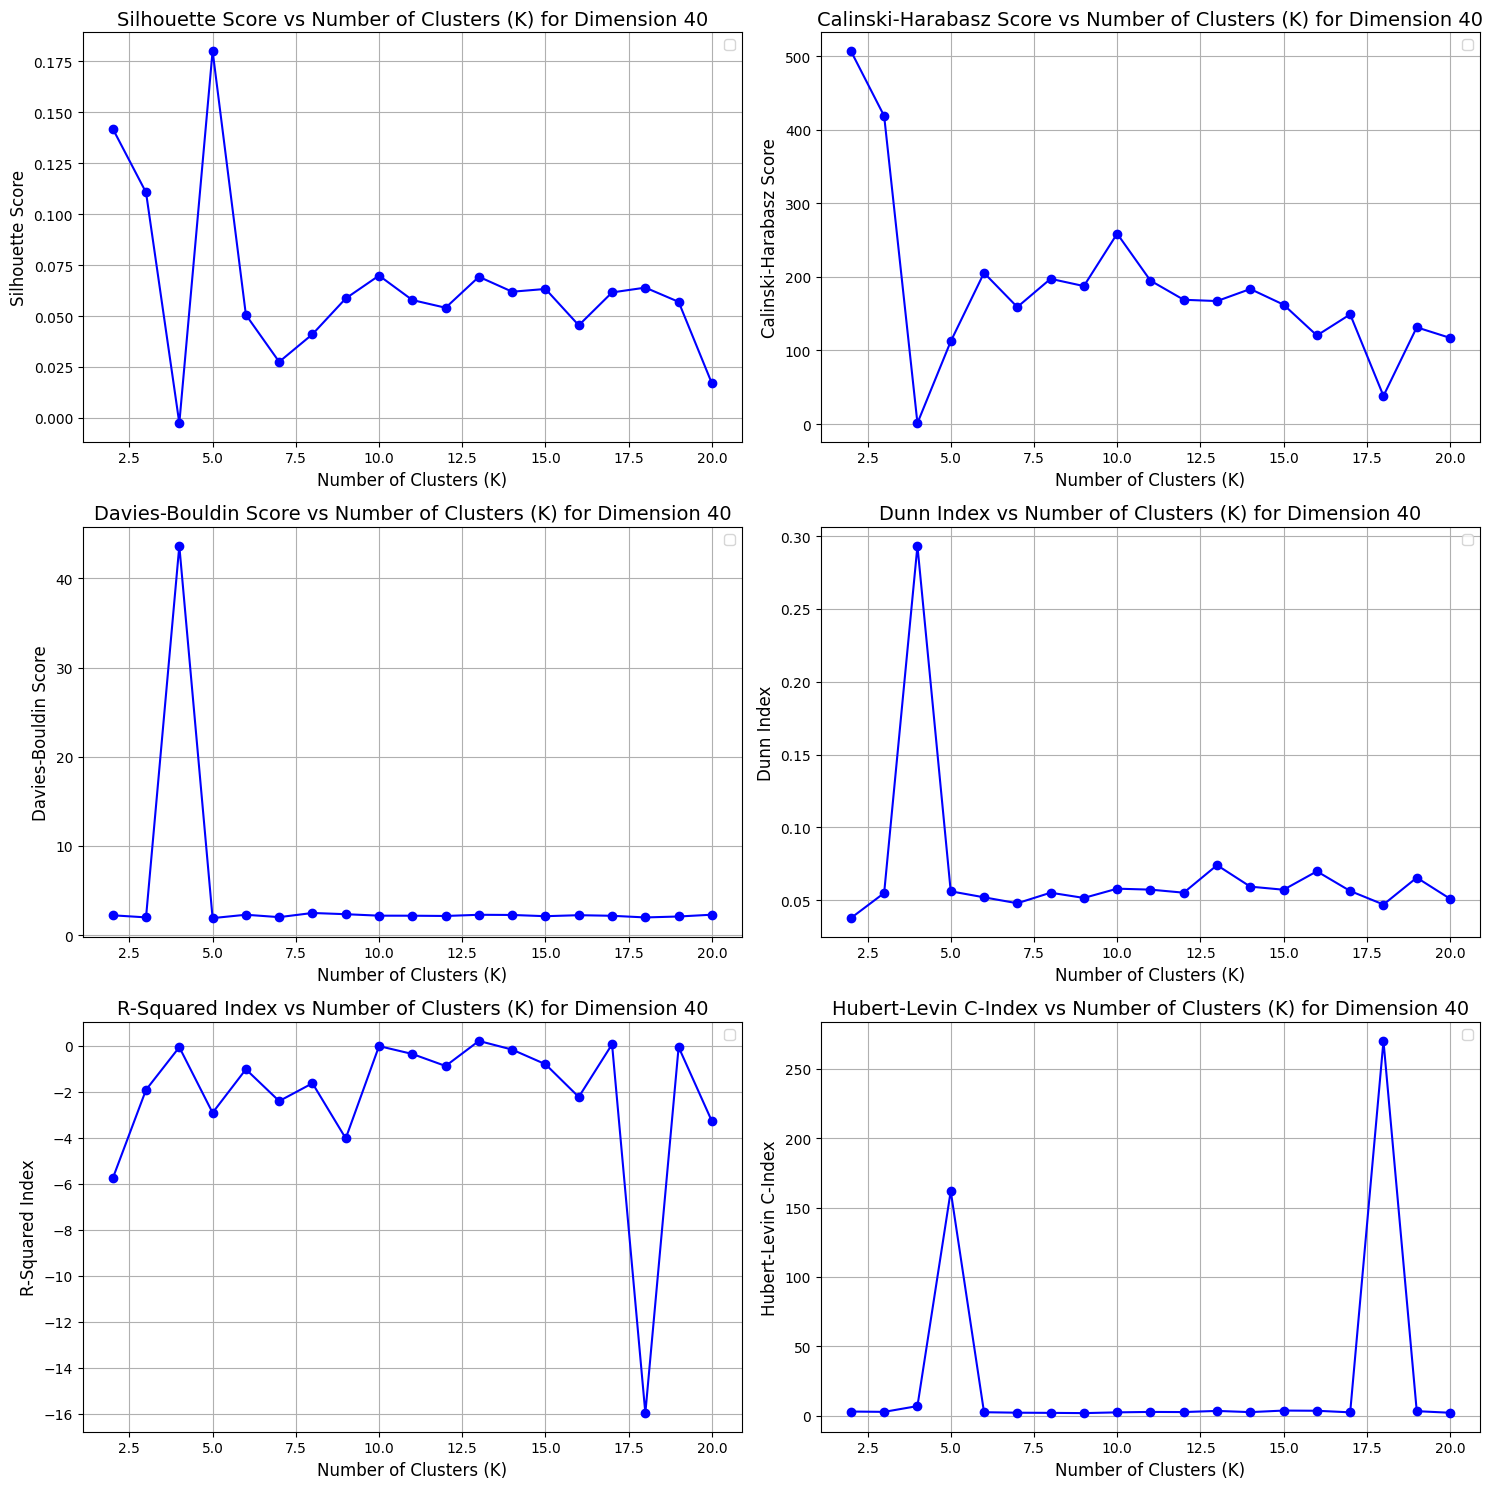

Plot saved: /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/clustering_graph.png


In [ ]:
import matplotlib.pyplot as plt

# Load the ranked clustering evaluation results from the CSV file
ranked_df = results_df
# List of metrics for plotting (updated to match the current column names)
metrics = [
    'Silhouette Score',
    'Calinski-Harabasz Score',
    'Davies-Bouldin Score',
    'Dunn Index',
    'R-Squared Index',
    'Hubert-Levin C-Index'
]

# Unique dimensions
dimensions = ranked_df['z_dim'].unique()

# Loop through each dimension and plot the metrics
for dim in dimensions:
    # Filter the data for the current dimension
    current_df = ranked_df[ranked_df['z_dim'] == dim]

    # Plot all metrics in a single grid layout for the current dimension
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows and 2 columns for 6 metrics

    # Flatten the axes for easier iteration
    axs = axs.flatten()

    # Plot each metric in a grid
    for i, metric in enumerate(metrics):
        axs[i].plot(current_df['n_clusters'], current_df[metric], marker='o', linestyle='-', color='b')

        optimal_k = 11
        if optimal_k in current_df['n_clusters'].values:
            axs[i].axvline(x=optimal_k, color='r', linestyle='--', label='Elbow Method Optimal Cluster')
            axs[i].scatter(
                optimal_k,
                current_df[current_df['n_clusters'] == optimal_k][metric].values[0],
                color='red',
                s=100,
                zorder=5
            )

        axs[i].set_title(f'{metric} vs Number of Clusters (K) for Dimension {dim}', fontsize=14)
        axs[i].set_xlabel('Number of Clusters (K)', fontsize=12)
        axs[i].set_ylabel(metric, fontsize=12)
        axs[i].grid(True)

        # Add the legend to each subplot
        axs[i].legend()

    # Adjust layout to ensure everything fits
    plt.tight_layout()
    save_path = os.path.join(save_dir, f'clustering_graph.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    print(f"Plot saved: {save_path}")
    plt.show()


##Generate topographic maps

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage.measure import block_reduce
import mne

'''
# Define ClusteringLayer
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights

    def build(self, input_shape):
        input_dim = input_shape[1]
        self.clusters = self.add_weight(name='clusters', shape=(self.n_clusters, input_dim), initializer='glorot_uniform')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        super(ClusteringLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

# Define the custom loss layer
@tf.keras.utils.register_keras_serializable()  # Registering the custom layer for model saving and loading
class CustomLossLayer(Layer):
    def call(self, inputs):
        train_z, train_xr, train_x = inputs
        loss_mmd = self.compute_mmd(train_z, train_z)
        loss_nll = K.mean(K.square(train_xr - train_x))
        self.add_loss(loss_mmd + loss_nll)
        return train_xr

    def compute_mmd(self, x, y):
        x_size = K.shape(x)[0]
        y_size = K.shape(y)[0]
        dim = K.shape(x)[1]
        tiled_x = K.tile(K.reshape(x, [x_size, 1, dim]), [1, y_size, 1])
        tiled_y = K.tile(K.reshape(y, [1, y_size, dim]), [x_size, 1, 1])
        return K.exp(-K.mean(K.square(tiled_x - tiled_y), axis=2) / K.cast(dim, 'float32'))

# Define the custom function
@tf.keras.utils.register_keras_serializable()  # Registering the custom function for model saving and loading
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch, dim), mean=0., stddev=1.)
    return mu + K.exp(sigma) * eps
'''
# Set up directories
base_dir = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16'
output_dir = '/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16'
os.makedirs(output_dir, exist_ok=True)

# Define parameters
dimensions = [40]  # Latent space dimensions
K_values = range(2, 21)  # Number of clusters
n_channels = 32  # EEG channels
batch_size = 20  # Batch size for processing clusters

# Set up MNE montage and info for EEG plotting
montage = mne.channels.make_standard_montage('biosemi32')  # Standard EEG montage
sfreq = 128  # Sampling frequency
ch_names = montage.ch_names[:n_channels]
ch_pos = montage.get_positions()['ch_pos']
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
info.set_montage(montage)

# Define global min and max values
'''
Global Min Value: -0.0002294054591982448
Global Max Value: 0.0002721753595462571

'''
GLOBAL_MIN = -0.0002294054591982448
GLOBAL_MAX = 0.0002721753595462571

combined_dir = os.path.join(output_dir, "combined_maps")
os.makedirs(combined_dir, exist_ok=True)

# Loop through each model (z_dim, k)
for z_dim in dimensions:
    for k in K_values:
        model_name = f'DCECv3_zdim_{z_dim}_nclusters_{k}'

        # Paths for saved data
        decoder_path = os.path.join(base_dir, f'DCEC_zdim_{z_dim}_nclusters_{k}_decoder.h5')  # Decoder model file
        centroids_path = os.path.join(base_dir, f'DCEC_zdim_{z_dim}_nclusters_{k}_cluster_centroids.npy')  # Adjust as needed

        # Check if all required files exist
        if not (os.path.exists(decoder_path) and os.path.exists(centroids_path)):
            print(f"Missing files for z_dim={z_dim}, k={k}. Skipping...")
            continue

        print(f"Processing z_dim={z_dim}, k={k}...")

        # Load decoder, latent space, and centroids
        with custom_object_scope({'ClusteringLayer': ClusteringLayer, 'CustomLossLayer': CustomLossLayer}):
            decoder = load_model(decoder_path, compile=False)
        cluster_centroids = np.load(centroids_path)
        num_maps = cluster_centroids.shape[0]
        print(f"Number of topographic maps that can be produced: {num_maps}")
        assert num_maps == k, f"Expected {k} centroids, but found {num_maps}."

        # Generate topographic maps for centroids
        topographic_maps_centroids = decoder.predict(cluster_centroids)

        # Create a figure with subplots for each cluster
        # Create a figure with subplots for each cluster
        fig, axes = plt.subplots(1, k, figsize=(k * 3, 3))  # Adjust figure size dynamically based on k
        fig.suptitle(f"Topographic Maps for z_dim={z_dim}, k={k}", fontsize=16)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        for cluster_idx, output_matrix in enumerate(topographic_maps_centroids):
            # Flatten and process the matrix
            flattened_map = output_matrix.flatten()
            if flattened_map.size != n_channels:
                flattened_map = block_reduce(flattened_map, block_size=(int(flattened_map.size // n_channels),), func=np.mean)

            rescaled_map = (flattened_map - flattened_map.min()) / (flattened_map.max() - flattened_map.min() + 1e-10)
            data_for_mne = rescaled_map[:n_channels]
            data_for_mne = np.expand_dims(data_for_mne, axis=1)  # Add the time dimension
            evoked = mne.EvokedArray(data_for_mne, info)

            # Call plot_topomap and assign the result to im_map
            im_map, _ = mne.viz.plot_topomap(  # Assign the result to im_map
                data_for_mne.flatten(),
                pos=evoked.info,
                axes=axes[cluster_idx],
                show=False,
                cmap="jet",
            )
            axes[cluster_idx].set_title(f"Map {cluster_idx + 1}", fontsize=10)

        cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Add shared colorbar
        cbar = fig.colorbar(im_map, cax=cbar_ax)
        cbar.set_label("Value", fontsize=12)
        cbar.set_ticks([0, 0.5, 1])
        cbar.set_ticklabels([f"{GLOBAL_MIN:.8f}", f"{(GLOBAL_MIN + GLOBAL_MAX) / 2:.8f}", f"{GLOBAL_MAX:.8f}"])

        # Save the figure for later combination
        image_path = os.path.join(combined_dir, f"z_dim_{z_dim}_k_{k}.png")
        plt.savefig(image_path)
        plt.close(fig)  # Close the figure to save memory



Processing z_dim=40, k=2...
Number of topographic maps that can be produced: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Processing z_dim=40, k=3...
Number of topographic maps that can be produced: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Processing z_dim=40, k=4...
Number of topographic maps that can be produced: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Processing z_dim=40, k=5...
Number of topographic maps that can be produced: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Processing z_dim=40, k=6...
Number of topographic maps that can be produced: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Processing z_dim=40, k=7...
Number of topographic maps that can be produced: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Processing z_dim=40, k=8...
Number of topographic maps that can be produced: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Processing z_dim=40, k=9...
Number of topographic maps that can be produced: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Processing z_dim=40, k=10...
Number of topographic maps 

## Combination of outputs

In [ ]:
from PIL import Image
import os

# Directory where the individual images are saved
combined_dir = "/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/combined_maps"  # Replace with alternative directory for testing
output_image_path = "/content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/v3_final_combined_topographic_maps.png"

# Get the list of image files sorted by k (ascending order)
image_files = sorted(
    [os.path.join(combined_dir, f) for f in os.listdir(combined_dir) if f.endswith(".png")],
    key=lambda x: int(x.split("_k_")[1].split(".png")[0])  # Extract k from filenames
)

# Open all images
images = [Image.open(img) for img in image_files]

# Determine the dimensions for consistent image size (based on k=20)
max_width = max(img.width for img in images)
max_height = max(img.height for img in images)

# Resize all images to the max dimensions while keeping aspect ratio
standardized_images = []
for img in images:
    img_aspect = img.width / img.height
    max_aspect = max_width / max_height

    # Adjust dimensions to maintain aspect ratio
    if img_aspect > max_aspect:
        new_width = max_width
        new_height = int(max_width / img_aspect)
    else:
        new_height = max_height
        new_width = int(max_height * img_aspect)

    # Resize the image
    resized_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

    # Add padding to match max dimensions
    padded_img = Image.new("RGB", (max_width, max_height), (255, 255, 255))  # White background
    padded_img.paste(resized_img, ((max_width - new_width) // 2, (max_height - new_height) // 2))
    standardized_images.append(padded_img)

# Calculate the total height for vertical stacking
total_height = sum(img.height for img in standardized_images)

# Create a blank image with the total width and height
combined_image = Image.new("RGB", (max_width, total_height))

# Paste each image into the combined image
y_offset = 0
for img in standardized_images:
    combined_image.paste(img, (0, y_offset))
    y_offset += img.height

# Save the final combined image
combined_image.save(output_image_path)
print(f"Final combined image saved at {output_image_path}")

Final combined image saved at /content/drive/MyDrive/Masters Dataset/DCEC/Learning rates/p16/v3_final_combined_topographic_maps.png
